<a href="https://colab.research.google.com/github/ahmadrayhan18-boop/borobudur-sentiment-analysis/blob/main/borobudur_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving ulasan_candi_borobudur.csv to ulasan_candi_borobudur.csv


In [ ]:
# prompt: baca file tripadvisor.csv saya

import pandas as pd

# Specify the delimiter explicitly (e.g., using a semicolon if your file uses semicolons)
df = pd.read_csv('ulasan_candi_borobudur.csv', sep=';')
# Or, handle delimiters within data using quotechar (e.g., using double quotes)
# df = pd.read_csv('tripadvisor.csv', quotechar='"')

print(df.head(10))

                    Pengunjung Tanggal Berkunjung  \
0      Affan Al farabi Siregar          30-Mar-25   
1                           IO          28-Mar-25   
2  Josua Clinton Manaek Sinaga          19-Mar-25   
3                           AF          14-Mar-25   
4             Christophe Glass          11-Mar-25   
5                           ND          05-Mar-25   
6                           ND          05-Mar-25   
7                           MG          05-Mar-25   
8                           RD          04-Mar-25   
9   Clarissa Sarira Rantetasak          03-Mar-25   

                                              Ulasan  
0                              Bagus. Bersih. Takjub  
1             Mantap, sangat berkesan untuk liburan.  
2  Sangat menarik pemandangannya dan belajar sejarah  
3                              Goood, recomnd banget  
4             Excellent hotel, product and location.  
5           Nyaman n terawat kawasan candinya cantik  
6  Nyaman n aman ada guide yg m

In [ ]:
print(df[['Pengunjung','Tanggal Berkunjung', 'Ulasan']].isnull().sum())

Pengunjung            7
Tanggal Berkunjung    3
Ulasan                2
dtype: int64


In [ ]:
df = df.dropna(subset=['Pengunjung','Tanggal Berkunjung', 'Ulasan'])

In [ ]:
print(df[['Pengunjung','Tanggal Berkunjung', 'Ulasan']].isnull().sum())

Pengunjung            0
Tanggal Berkunjung    0
Ulasan                0
dtype: int64


In [ ]:
df.head(10)

Pengunjung Tanggal Berkunjung  \
0      Affan Al farabi Siregar          30-Mar-25   
1                           IO          28-Mar-25   
2  Josua Clinton Manaek Sinaga          19-Mar-25   
3                           AF          14-Mar-25   
4             Christophe Glass          11-Mar-25   
5                           ND          05-Mar-25   
6                           ND          05-Mar-25   
7                           MG          05-Mar-25   
8                           RD          04-Mar-25   
9   Clarissa Sarira Rantetasak          03-Mar-25   

                                              Ulasan  
0                              Bagus. Bersih. Takjub  
1             Mantap, sangat berkesan untuk liburan.  
2  Sangat menarik pemandangannya dan belajar sejarah  
3                              Goood, recomnd banget  
4             Excellent hotel, product and location.  
5           Nyaman n terawat kawasan candinya cantik  
6  Nyaman n aman ada guide yg memandu n bercerita...  
7           I think everything it’s good…………………………..  
8  One of my parents dream to go here and voilaaa...  
9                        keren banget oelanahahn oke

# **CLEANSING**

In [ ]:
import pandas as pd
import re
from datetime import datetime

# Fungsi untuk membersihkan teks
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'[âŽðŸï]', '', text)
    return text

# Fungsi untuk membersihkan dan menstandarkan tanggal
def clean_date(date_str):
    # Hapus karakter yang tidak diinginkan
    date_str = re.sub(r' • (teman|sendiri|pasangan|keluarga|bisnis)', '', date_str, flags=re.IGNORECASE)
    date_str = date_str.strip()  # Hapus whitespace di awal dan akhir

    # Coba untuk mengonversi ke format tanggal yang konsisten
    for fmt in ("%b %Y", "%d-%b-%y", "%d-%b-%Y", "%d/%m/%Y", "%Y-%m-%d", "%b %Y", "%b-%y", "%b-%Y"):
        try:
            return datetime.strptime(date_str, fmt).strftime("%Y-%m-%d")
        except ValueError:
            continue

    # Jika format tidak cocok, coba konversi format teks seperti "Agu 2017" menjadi "YYYY-MM-DD"
    month_mapping = {
        'jan': '01', 'feb': '02', 'mar': '03', 'apr': '04',
        'mei': '05', 'jun': '06', 'jul': '07', 'agu': '08',
        'sep': '09', 'okt': '10', 'nov': '11', 'des': '12'
    }

    # Cek apakah formatnya "Bulan Tahun" (misalnya "Agu 2017")
    parts = date_str.split()
    if len(parts) == 2:
        month_str, year_str = parts
        month_str = month_str.lower()[:3]  # Ambil 3 huruf pertama dan kecilkan
        if month_str in month_mapping:
            month = month_mapping[month_str]
            return f"{year_str}-{month}-01"  # Mengasumsikan tanggal 1

    return date_str  # Kembalikan string asli jika tidak ada format yang cocok

# Membaca file CSV dengan pemisah titik koma
try:
    df = pd.read_csv("ulasan_candi_borobudur.csv", sep=';', on_bad_lines='skip')  # Menggunakan pemisah titik koma
except Exception as e:
    print(f"Error reading the CSV file: {e}")

# Bersihkan kolom 'Ulasan'
if 'Ulasan' in df.columns:
    df['Ulasan'] = df['Ulasan'].astype(str).apply(clean_text)
else:
    print("Error: 'Ulasan' column not found in the DataFrame.")

# Bersihkan kolom 'Tanggal Berkunjung'
if 'Tanggal Berkunjung' in df.columns:
    df['Tanggal Berkunjung'] = df['Tanggal Berkunjung'].astype(str).apply(clean_date)
else:
    print("Error: 'Tanggal Berkunjung' column not found in the DataFrame.")

# Tampilkan sampel acak dari DataFrame
random_samples = df.sample(n=20)  # Sesuaikan n dengan jumlah sampel acak yang Anda inginkan
print(random_samples)

                               Pengunjung Tanggal Berkunjung  \
748                    Dwiky Pujo Pratama         2023-05-10   
382               Hari Abdulfarits Ismail         2023-12-12   
2877                            Kabulllll         2017-06-01   
2326                             qaireena         2016-01-01   
552                                    CH         2023-08-19   
500                arief adhadian aditama         2023-09-28   
978                        anggraeni arum         2022-09-29   
299   ARTHASYA CHRISTIN ULI BASA MARPAUNG         2024-02-13   
622                   christina yuny arta         2023-07-07   
1246                                   RM         2024-12-25   
571                       kezia subiyanto         2023-08-01   
78                    Sugiharti Sugiharti         2025-01-02   
394                     Dita Andi Saputro         2023-12-08   
511                 Guruh Maudy Wicaksana         2023-09-17   
4038                               anki5

In [ ]:
# Mengonversi kolom 'Tanggal Berkunjung' menjadi tipe datetime
df['Tanggal Berkunjung'] = pd.to_datetime(df['Tanggal Berkunjung'])

# Menghitung jumlah pengunjung per tahun
pengunjung_per_tahun = df['Tanggal Berkunjung'].dt.year.value_counts().sort_index()

# Menampilkan hasil
print(pengunjung_per_tahun)

Tanggal Berkunjung
2010.0      4
2011.0     12
2012.0     18
2013.0     76
2014.0    336
2015.0    720
2016.0    739
2017.0    460
2018.0     96
2019.0     54
2020.0      8
2021.0     54
2022.0    571
2023.0    738
2024.0    365
2025.0    112
Name: count, dtype: int64


In [ ]:
# Menghapus baris yang memiliki nilai kosong di kolom 'Pengunjung', 'Tanggal Berkunjung', dan 'Ulasan'
df = df.dropna(subset=['Pengunjung', 'Tanggal Berkunjung', 'Ulasan'], how='any')

In [ ]:
# Menghapus baris yang memiliki nilai kosong di kolom 'Ulasan'
df = df.dropna(subset=['Ulasan'], how='any')

In [ ]:
import pandas as pd

# Memuat file CSV
df = pd.read_csv('ulasan_candi_borobudur_cleaned.csv')

# Memeriksa apakah ada nilai kosong di seluruh DataFrame
has_nulls = df.isnull().values.any()
if has_nulls:
    print("Ada nilai kosong di DataFrame.")
else:
    print("Semua kolom terisi.")

# Menampilkan baris yang memiliki nilai kosong
empty_rows = df[df.isnull().any(axis=1)]
if not empty_rows.empty:
    print("Baris dengan nilai kosong:")
    print(empty_rows)
else:
    print("Tidak ada baris dengan nilai kosong.")

Semua kolom terisi.
Tidak ada baris dengan nilai kosong.


In [ ]:
import pandas as pd

# Memuat file CSV
df = pd.read_csv('ulasan_candi_borobudur_cleaned.csv')

# Memeriksa jumlah missing values di setiap kolom
missing_values = df.isnull().sum()

# Menampilkan hasil
print("Jumlah missing values di setiap kolom:")
print(missing_values)

Jumlah missing values di setiap kolom:
Pengunjung;Tanggal Berkunjung;Ulasan    0
dtype: int64


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('ulasan_candi_borobudur_cleaned.csv', sep=';') # Specify the correct separator

# Print the actual column names in your DataFrame
print(df.columns)

# Access the columns using the correct names (adjust if needed based on the output of df.columns)
print(df[['Pengunjung', 'Tanggal Berkunjung', 'Ulasan']].isnull().sum())

Index(['Pengunjung', 'Tanggal Berkunjung', 'Ulasan'], dtype='object')
Pengunjung             0
Tanggal Berkunjung     0
Ulasan                18
dtype: int64


In [ ]:
df = df.dropna(subset=['Ulasan']) #menghapus baris yang missing value

#df['Pengunjung'].fillna('Unknown', inplace=True)#mengganti missing value dengan unknown

#most_common = df['Pengunjung'].mode()[0]  # Ambil nilai yang paling sering muncul
#df['Pengunjung'].fillna(most_common, inplace=True)

print(df[['Pengunjung', 'Tanggal Berkunjung', 'Ulasan']].isnull().sum())

Pengunjung            0
Tanggal Berkunjung    0
Ulasan                0
dtype: int64


In [ ]:
df.to_csv("ulasan_candi_borobudur_cleaned.csv", sep=';', index=False)

# **PREPROCESSING TEKS**
(case folding, stopword removal, word normalization, tokenization, stemming)

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving ulasan_candi_borobudur_cleaned.csv to ulasan_candi_borobudur_cleaned.csv


In [ ]:
# prompt: baca file yang saya upload

import pandas as pd

# Specify the delimiter explicitly (e.g., using a semicolon if your file uses semicolons)
df = pd.read_csv('ulasan_candi_borobudur_cleaned.csv', sep=';')


print(df.head(10))

                    Pengunjung Tanggal Berkunjung  \
0      Affan Al farabi Siregar         30/03/2025   
1                           IO         28/03/2025   
2  Josua Clinton Manaek Sinaga         19/03/2025   
3                           AF         14/03/2025   
4             Christophe Glass         11/03/2025   
5                           ND         05/03/2025   
6                           ND         05/03/2025   
7                           MG         05/03/2025   
8                           RD         04/03/2025   
9   Clarissa Sarira Rantetasak         03/03/2025   

                                              Ulasan  
0                                bagus bersih takjub  
1               mantap sangat berkesan untuk liburan  
2  sangat menarik pemandangannya dan belajar sejarah  
3                               goood recomnd banget  
4               excellent hotel product and location  
5           nyaman n terawat kawasan candinya cantik  
6  nyaman n aman ada guide yg m

# **CASE FOLDING**
Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z'.

In [ ]:
import pandas as pd
import re

def clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return df

# Load the CSV file you uploaded with the correct separator
filename = "ulasan_candi_borobudur_cleaned.csv"
df = pd.read_csv(filename, sep=';')  # Specify the separator as ';'

# Print the columns to check their names
print("Nama kolom dalam DataFrame:", df.columns)

# Display the first few rows of the DataFrame to understand its structure
print(df.head())

# Apply the cleaning function on the 'Ulasan' column to create a new column 'Ulasan_Cleaned'
if 'Ulasan' in df.columns:
    df = clean_text(df, 'Ulasan', 'Ulasan_Cleaned')
    # Display the relevant columns to verify
    print(df[['Pengunjung', 'Tanggal Berkunjung', 'Ulasan_Cleaned']].head(20))
else:
    print("Kolom 'Ulasan' tidak ditemukan dalam DataFrame.")

    # prompt: simpan file dengan nama ulasan_candi_borobudur_casefolding.csv

df.to_csv('ulasan_candi_borobudur_casefolding.csv', sep=';', index=False)
print("Data berhasil disimpan ke 'ulasan_candi_borobudur_casefolding.csv'")


Nama kolom dalam DataFrame: Index(['Pengunjung', 'Tanggal Berkunjung', 'Ulasan'], dtype='object')
                    Pengunjung Tanggal Berkunjung  \
0      Affan Al farabi Siregar         30/03/2025   
1                           IO         28/03/2025   
2  Josua Clinton Manaek Sinaga         19/03/2025   
3                           AF         14/03/2025   
4             Christophe Glass         11/03/2025   

                                              Ulasan  
0                                bagus bersih takjub  
1               mantap sangat berkesan untuk liburan  
2  sangat menarik pemandangannya dan belajar sejarah  
3                               goood recomnd banget  
4               excellent hotel product and location  
                     Pengunjung Tanggal Berkunjung  \
0       Affan Al farabi Siregar         30/03/2025   
1                            IO         28/03/2025   
2   Josua Clinton Manaek Sinaga         19/03/2025   
3                            AF      

In [ ]:
import pandas as pd

# Specify the delimiter explicitly (e.g., using a semicolon if your file uses semicolons)
df = pd.read_csv('ulasan_candi_borobudur_casefolding.csv', sep=';')


print(df.head(10))

                    Pengunjung Tanggal Berkunjung  \
0      Affan Al farabi Siregar         30/03/2025   
1                           IO         28/03/2025   
2  Josua Clinton Manaek Sinaga         19/03/2025   
3                           AF         14/03/2025   
4             Christophe Glass         11/03/2025   
5                           ND         05/03/2025   
6                           ND         05/03/2025   
7                           MG         05/03/2025   
8                           RD         04/03/2025   
9   Clarissa Sarira Rantetasak         03/03/2025   

                                              Ulasan  \
0                                bagus bersih takjub   
1               mantap sangat berkesan untuk liburan   
2  sangat menarik pemandangannya dan belajar sejarah   
3                               goood recomnd banget   
4               excellent hotel product and location   
5           nyaman n terawat kawasan candinya cantik   
6  nyaman n aman ada gui

# **Stopword Removal**
Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Pastikan stopwords sudah diunduh
nltk.download('stopwords')

# Load data ulasan
df = pd.read_csv('ulasan_candi_borobudur_casefolding.csv', sep=';')

# Load kamus alay dengan separator ';'
kamus_df = pd.read_csv('kamus_alay.csv', sep=';')
print("Kolom kamus alay:", kamus_df.columns)
print(kamus_df.head())

# Membuat dictionary dari kamus alay
kamus_alay = dict(zip(kamus_df['slang'], kamus_df['formal']))

# Gabungkan stopwords bahasa Indonesia dan Inggris
stop_id = set(stopwords.words('indonesian'))
stop_en = set(stopwords.words('english'))
stopwords_all = stop_id.union(stop_en)

def replace_slang(text):
    if isinstance(text, str):
        words = text.split()
        replaced_words = [kamus_alay.get(word, word) for word in words]
        return ' '.join(replaced_words)
    return text

def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()
        filtered_words = [word for word in words if word not in stopwords_all]
        return ' '.join(filtered_words)
    return text

# Terapkan penggantian kata slang
df['Ulasan_Cleaned'] = df['Ulasan_Cleaned'].apply(replace_slang)

# Terapkan stopword removal
df['Ulasan_NoStopword'] = df['Ulasan_Cleaned'].apply(remove_stopwords)

# Tampilkan hasil untuk verifikasi
print(df[['Pengunjung', 'Tanggal Berkunjung', 'Ulasan_Cleaned', 'Ulasan_NoStopword']].head(20))

# Simpan ke file CSV baru
df.to_csv('ulasan_candi_borobudur_stopword.csv', sep=';', index=False)
print("Data berhasil disimpan ke 'ulasan_candi_borobudur_stopword.csv'")


Kolom kamus alay: Index(['slang', 'formal'], dtype='object')
     slang    formal
0     woww       wow
1    aminn      amin
2      met   selamat
3   netaas   menetas
4  keberpa  keberapa
                     Pengunjung Tanggal Berkunjung  \
0       Affan Al farabi Siregar         30/03/2025   
1                            IO         28/03/2025   
2   Josua Clinton Manaek Sinaga         19/03/2025   
3                            AF         14/03/2025   
4              Christophe Glass         11/03/2025   
5                            ND         05/03/2025   
6                            ND         05/03/2025   
7                            MG         05/03/2025   
8                            RD         04/03/2025   
9    Clarissa Sarira Rantetasak         03/03/2025   
10              Adi Wora Achmad         02/03/2025   
11              Adi Wora Achmad         02/03/2025   
12           Siesca Faras Metha         26/02/2025   
13                           AL         26/02/2025   
14 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Tokenizing**

Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [ ]:
import pandas as pd
import nltk

# Pastikan paket punkt sudah diunduh untuk tokenisasi
nltk.download('punkt')

# Load data yang sudah melalui tahap stopword removal
df = pd.read_csv('ulasan_candi_borobudur_stopword.csv', sep=';')

# Lakukan tokenisasi pada kolom 'Ulasan_NoStopword'
# Menggunakan word_tokenize jika tersedia, jika tidak, gunakan str.split()
try:
    from nltk.tokenize import word_tokenize
    df['text_tokens'] = df['Ulasan_NoStopword'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])
except LookupError:
    print("Menggunakan str.split() sebagai alternatif tokenisasi.")
    df['text_tokens'] = df['Ulasan_NoStopword'].apply(lambda x: x.split() if isinstance(x, str) else [])

# Tampilkan beberapa baris hasil tokenisasi untuk verifikasi
print(df[['Pengunjung', 'Tanggal Berkunjung', 'Ulasan_NoStopword', 'text_tokens']].head(20))

# Simpan hasil tokenisasi ke file baru
df.to_csv('ulasan_candi_borobudur_tokenized.csv', sep=';', index=False)
print("Data berhasil disimpan ke 'ulasan_candi_borobudur_tokenized.csv'")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Menggunakan str.split() sebagai alternatif tokenisasi.
                     Pengunjung Tanggal Berkunjung  \
0       Affan Al farabi Siregar         30/03/2025   
1                            IO         28/03/2025   
2   Josua Clinton Manaek Sinaga         19/03/2025   
3                            AF         14/03/2025   
4              Christophe Glass         11/03/2025   
5                            ND         05/03/2025   
6                            ND         05/03/2025   
7                            MG         05/03/2025   
8                            RD         04/03/2025   
9    Clarissa Sarira Rantetasak         03/03/2025   
10              Adi Wora Achmad         02/03/2025   
11              Adi Wora Achmad         02/03/2025   
12           Siesca Faras Metha         26/02/2025   
13                           AL         26/02/2025   
14                           RR         21/02/2025   
15                           RN         19/02/2025   
16                         

# **Stemming**
Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia kita dapat menggunakan library Python Sastrawi yang sudah kita siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [ ]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import ast
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Load data
df = pd.read_csv('ulasan_candi_borobudur_tokenized.csv', sep=';')

# Ubah string list jadi list Python
df['text_tokens'] = df['text_tokens'].apply(ast.literal_eval)

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Terapkan stemming
df['text_stemmed'] = df['text_tokens'].apply(stem_tokens)

# Simpan hasil
df.to_csv('ulasan_candi_borobudur_stemmed.csv', sep=';', index=False)
print("Data berhasil disimpan ke 'ulasan_candi_borobudur_stemmed.csv'")


Data berhasil disimpan ke 'ulasan_candi_borobudur_stemmed.csv'


# **TF IDF**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load data hasil stemming
df = pd.read_csv('ulasan_candi_borobudur_stemmed.csv', sep=';')

# Gabungkan kembali token menjadi kalimat
df['text_joined'] = df['text_stemmed'].apply(lambda tokens: ' '.join(eval(tokens)) if isinstance(tokens, str) else ' '.join(tokens))

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_joined'])

# Ubah ke DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Gabungkan dengan informasi awal jika perlu
result = pd.concat([df[['Pengunjung', 'Tanggal Berkunjung']], tfidf_df], axis=1)

# Simpan ke CSV
result.to_csv('ulasan_candi_borobudur_tfidf.csv', sep=';', index=False)
print("Hasil TF-IDF berhasil disimpan ke 'ulasan_candi_borobudur_tfidf.csv'")

Hasil TF-IDF berhasil disimpan ke 'ulasan_candi_borobudur_tfidf.csv'


label

In [ ]:
import pandas as pd
from transformers import pipeline

# Load data
df = pd.read_csv('ulasan_candi_borobudur_stemmed.csv', sep=';')

# Pastikan kolom 'Ulasan_NoStopword' ada, kalau tidak bisa sesuaikan
text_column = 'Ulasan_NoStopword'

# Inisialisasi pipeline sentiment analysis
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
sentiment_pipe = pipeline("sentiment-analysis", model=model_name)

# Fungsi memetakan label 1-5 stars ke Positif/Negatif
def map_label_score(result):
    label = result['label']
    if label in ['1 star', '2 stars']:
        return 'Negatif'
    elif label in ['4 stars', '5 stars']:
        return 'Positif'
    else:  # 3 stars dianggap Negatif supaya hanya 2 kelas
        return 'Negatif'

# Prediksi sentimen
def predict_sentiment(text):
    try:
        result = sentiment_pipe(text)[0]
        return map_label_score(result)
    except Exception as e:
        print(f"Error: {e} saat memproses text: {text}")
        return 'Negatif'

# Terapkan labeling ke kolom ulasan
df['sentiment'] = df[text_column].astype(str).apply(predict_sentiment)

# Simpan hasil ke file baru
df.to_csv('ulasan_candi_borobudur_labeled.csv', sep=';', index=False)
print("Data telah diberi label sentimen dan disimpan pada 'ulasan_candi_borobudur_labeled.csv'")

# Catatan:
# - Kolom 'text_tokens' dan 'text_stemmed' digunakan untuk pembobotan fitur (misal TF-IDF) saat modeling.
# - Kolom 'Ulasan_NoStopword' menjadi input utama untuk pemberian label sentimen.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (653 > 512). Running this sequence through the model will result in indexing errors


Error: The size of tensor a (653) must match the size of tensor b (512) at non-singleton dimension 1 saat memproses text: prokuil haruslihat benarbenar kuil bali perbedaan heran warisan dunia unescoada jenis kereta yangkurang kereta pergi bioskop film dokumenter temple museum temple areasarung disediakan wo biaya tambahan keuntungan membawa baca inikontraharga membayar huger rp rp dibandingkan penduduk dibandingkan upah indonesia menelepon adil sisi dibandingkan kuil bali biaya masuk benarbenar bebas baikjika membawa sarong pergi berniat lewatkan matahari terbenam baca inijuga tandatanda memanjat diperbolehkan menyentuh serius peduli penjaga keamanan pulau islam mengurus kuil hindu buddha bali memalukan mengunjungi kuil utara timur diperbaiki mudah anique batubatu diganti warnathe exitmeskipuncinderamatabarangnya cinderamata thats liku tokotoko melebihlebihkan ekstra village pintu candi daerah puluhan suvenir berdirisaya benarbenar menghitung negatif kuil beda bali jawa wisata asia ber

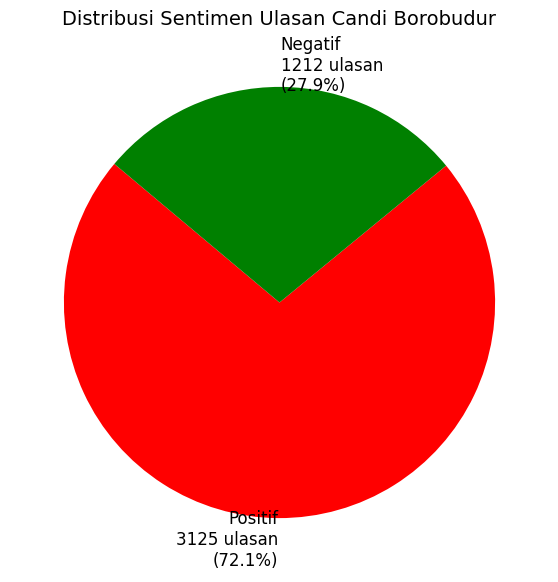

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data hasil labeling
df = pd.read_csv('ulasan_candi_borobudur_binary_labeled.csv', sep=';')

# Hitung jumlah ulasan per sentimen
sentiment_counts = df['sentiment'].value_counts()

# Buat label dengan jumlah dan persentase
labels = [f"{label}\n{count} ulasan\n({count / sentiment_counts.sum() * 100:.1f}%)"
          for label, count in zip(sentiment_counts.index, sentiment_counts.values)]

# Visualisasi dengan pie chart
plt.figure(figsize=(7,7))
plt.pie(sentiment_counts, labels=labels, colors=['red', 'green'], startangle=140, textprops={'fontsize': 12})
plt.title('Distribusi Sentimen Ulasan Candi Borobudur', fontsize=14)
plt.show()


In [ ]:
import pandas as pd
from transformers import pipeline

# Load data
df = pd.read_csv('ulasan_candi_borobudur_stemmed.csv', sep=';')

# Pastikan kolom 'Ulasan_NoStopword' tersedia
text_column = 'Ulasan_Cleaned'
if text_column not in df.columns:
    raise ValueError(f"Kolom '{text_column}' tidak ditemukan dalam data.")

# Inisialisasi pipeline analisis sentimen
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
sentiment_pipe = pipeline("sentiment-analysis", model=model_name)

# Fungsi pemetaan label bintang ke kelas sentimen
def map_label_score(result):
    label = result['label']
    if label in ['1 star', '2 stars']:
        return 'Negatif'
    elif label in ['4 stars', '5 stars']:
        return 'Positif'
    elif label == '3 stars':
        return 'Netral'
    else:
        return 'Tidak Diketahui'

# Fungsi prediksi sentimen
def predict_sentiment(text):
    try:
        result = sentiment_pipe(text)[0]
        return map_label_score(result)
    except Exception as e:
        print(f"Error saat memproses teks: {text}\nDetail error: {e}")
        return 'Tidak Diketahui'

# Prediksi sentimen untuk setiap ulasan
df['sentiment'] = df[text_column].astype(str).apply(predict_sentiment)

# Simpan hasil 3 kelas
df.to_csv('ulasan_candi_borobudur_labeled_3kelas.csv', sep=';', index=False)
print("Labeling sentimen (3 kelas) selesai dan disimpan di 'ulasan_candi_borobudur_labeled_3kelas.csv'.")

# Simpan data Netral untuk dilabel manual jika ingin ubah jadi 2 kelas
df_netral = df[df['sentiment'] == 'Netral']
df_netral[['Ulasan_NoStopword']].to_csv('ulasan_netral_perlu_labeling.csv', sep=';', index=False)
print("Ulasan Netral disimpan di 'ulasan_netral_perlu_labeling.csv' untuk pelabelan manual.")


Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (537 > 512). Running this sequence through the model will result in indexing errors


Error saat memproses teks: berwisata adalah cara terbaik untuk lepas sejenak dari rutinitas seharihari yang bisa jadi membuat pikiran penat dan bosan seperti saya dan teman yang seorang mahasiswi di salah satu universitas negeri di semarang rutinitas kampus dan tugastugas yang ah mungkin membuat jenuh penat dan bosan pada akhir bulan oktober kami memutuskan untuk mbolang bareng dan tujuan kami yaitu ke salah satu peninggalan budaya di indonesia yaitu candi borobudur kami memang suka jalanjalan ya semacam travelling begitu tapi disesuaikan dengan kantong mahasiswa ya tentunya yang enggak berat diongkos selain karena masih masuk kantong mahasiswa karena tiket masuk waktu itu hanya saja per orang dan parkir motor kalau tidak salah untuk bensin cukup lah uang karena motorku lumayan boros bensin sihcandi borobudur yang bertepat di magelang dekat dengan kota kami kuliah yaitu kota semarang sehingga perjalanan masih bisa kami jangkau dengan menggunakan sepeda motor kirakira perjalanan dengan 

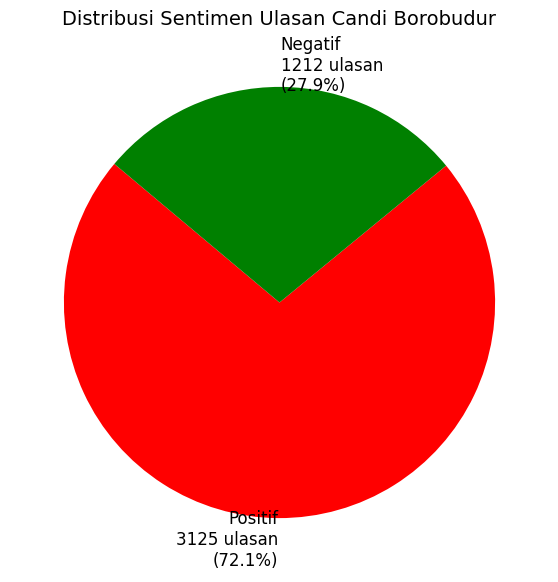

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data hasil labeling
df = pd.read_csv('ulasan_candi_borobudur_binary_labeled.csv', sep=';')

# Hitung jumlah ulasan per sentimen
sentiment_counts = df['sentiment'].value_counts()

# Buat label dengan jumlah dan persentase
labels = [f"{label}\n{count} ulasan\n({count / sentiment_counts.sum() * 100:.1f}%)"
          for label, count in zip(sentiment_counts.index, sentiment_counts.values)]

# Visualisasi dengan pie chart
plt.figure(figsize=(7,7))
plt.pie(sentiment_counts, labels=labels, colors=['red', 'green'], startangle=140, textprops={'fontsize': 12})
plt.title('Distribusi Sentimen Ulasan Candi Borobudur', fontsize=14)
plt.show()



# **Split Data**

In [ ]:
import pandas as pd

df = pd.read_csv('ulasan_candi_borobudur_binary_labeled.csv', sep=';')

Pembagian fitur dan label

In [ ]:
X = df['Ulasan_Cleaned']  # atau 'text_stemmed', sesuai yang ingin kamu pakai
y = df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# **Vektorisasi/pembobotan dengan TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi vectorizer
vectorizer = TfidfVectorizer()

# Fit dan transform data training, lalu transform data test
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# **Modelling Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

y_pred_nb = nb_model.predict(X_test_vec)

print("=== Naive Bayes ===")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

=== Naive Bayes ===
[[ 59 184]
 [  4 621]]
              precision    recall  f1-score   support

     Negatif       0.94      0.24      0.39       243
     Positif       0.77      0.99      0.87       625

    accuracy                           0.78       868
   macro avg       0.85      0.62      0.63       868
weighted avg       0.82      0.78      0.73       868



# **Modelling SVM**

In [ ]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)

y_pred_svm = svm_model.predict(X_test_vec)

print("=== SVM ===")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

=== SVM ===
[[165  78]
 [ 51 574]]
              precision    recall  f1-score   support

     Negatif       0.76      0.68      0.72       243
     Positif       0.88      0.92      0.90       625

    accuracy                           0.85       868
   macro avg       0.82      0.80      0.81       868
weighted avg       0.85      0.85      0.85       868



In [ ]:
# prompt: baca file bernama tripadvisor.csv dengan tujuan untuk mengethaui berapa jumlah datanya tanpa menghitung kolom yang kosong dan row no1 (karena itu variabelnya)
import pandas as pd

# Baca file CSV
df = pd.read_csv('tripadvisor.csv', sep=';')

# Menghapus baris header (row no1) jika memang row pertama adalah header
# Jika row pertama *bukan* header dan ingin dihapus, gunakan:
# df = df.iloc[1:]

# Menghitung jumlah data setelah menghapus baris kosong di kolom yang relevan
# Menggunakan 'Ulasan' sebagai contoh kolom yang harus ada datanya
jumlah_data = df.dropna(subset=['Ulasan']).shape[0]

print(f"Jumlah data (setelah menghapus baris kosong di kolom 'Ulasan'): {jumlah_data}")


Jumlah data (setelah menghapus baris kosong di kolom 'Ulasan'): 2642


In [ ]:
import pandas as pd

df = pd.read_csv('ulasan_borobudur_labeled_2kelas.csv', sep=';')

X = df['ulasan']  # atau 'text_stemmed', sesuai yang ingin kamu pakai
y = df['sentiment']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi vectorizer
vectorizer = TfidfVectorizer()

# Fit dan transform data training, lalu transform data test
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

y_pred_nb = nb_model.predict(X_test_vec)

print("=== Naive Bayes ===")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)

y_pred_svm = svm_model.predict(X_test_vec)

print("=== SVM ===")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

=== Naive Bayes ===
[[  3 147]
 [  0 719]]
              precision    recall  f1-score   support

     negatif       1.00      0.02      0.04       150
     positif       0.83      1.00      0.91       719

    accuracy                           0.83       869
   macro avg       0.92      0.51      0.47       869
weighted avg       0.86      0.83      0.76       869

=== SVM ===
[[ 82  68]
 [ 35 684]]
              precision    recall  f1-score   support

     negatif       0.70      0.55      0.61       150
     positif       0.91      0.95      0.93       719

    accuracy                           0.88       869
   macro avg       0.81      0.75      0.77       869
weighted avg       0.87      0.88      0.88       869



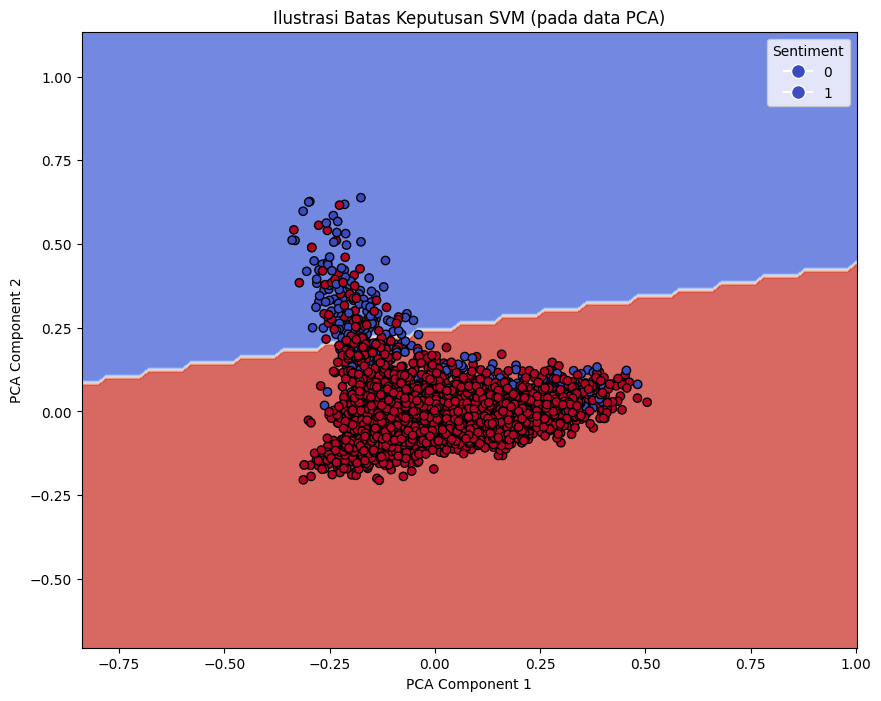

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
df = pd.read_csv('ulasan_borobudur_labeled_2kelas.csv', sep=';')

# Filter data to include only 'positif' and 'negatif' sentiments for visualization
df_filtered = df[df['sentiment'].isin(['positif', 'negatif'])].copy()

X_filtered = df_filtered['ulasan']
y_filtered = df_filtered['sentiment']

# Split data (optional, but good practice to work with train/test splits)
# For visualization purposes on the whole filtered dataset, we can skip train_test_split
# or apply PCA and visualize on the test set if split is desired.
# Let's visualize the decision boundary based on the whole filtered dataset for clarity.

# Vektorisasi/pembobotan dengan TF-IDF on the filtered data
vectorizer = TfidfVectorizer()
X_filtered_vec = vectorizer.fit_transform(X_filtered)

# Latih LinearSVC on the full TF-IDF data (as before)
svm_model = LinearSVC()
svm_model.fit(X_filtered_vec, y_filtered)

# --- Visualisasi Hyperplane SVM ---

# Reduce dimensionality using PCA to 2 components for visualization
pca = PCA(n_components=2)
X_filtered_pca = pca.fit_transform(X_filtered_vec.toarray()) # Convert sparse matrix to dense array

# Map filtered labels to numeric values for PCA model training and plotting
label_map = {'positif': 1, 'negatif': 0} # Ensure lowercase keys match filtered data
y_filtered_numeric = y_filtered.map(label_map)

# Train a LinearSVC on the PCA-reduced data for visualization purposes
# NOTE: This model is ONLY for visualizing the decision boundary in 2D PCA space.
# The actual SVM model for prediction should be trained on the full TF-IDF data (svm_model above).
svm_model_pca = LinearSVC()
svm_model_pca.fit(X_filtered_pca, y_filtered_numeric)

# Create a grid to visualize the decision boundary
x_min, x_max = X_filtered_pca[:, 0].min() - 0.5, X_filtered_pca[:, 0].max() + 0.5
y_min, y_max = X_filtered_pca[:, 1].min() - 0.5, X_filtered_pca[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on the grid points using the SVM model trained on PCA data
Z = svm_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour lines (decision boundary) and the data points
plt.figure(figsize=(10, 8))

# Use the numeric predictions Z for contour plot
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the data points using the numeric labels
scatter = plt.scatter(X_filtered_pca[:, 0], X_filtered_pca[:, 1], c=y_filtered_numeric, cmap=plt.cm.coolwarm, edgecolors='k')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Ilustrasi Batas Keputusan SVM (pada data PCA)')

# Create a legend based on the original sentiment labels
# Use the original sentiment labels from the filtered data for legend
unique_labels = y_filtered.unique()
colors_for_legend = [plt.cm.coolwarm(svm_model_pca.classes_[i]) for i in range(len(svm_model_pca.classes_))]
handles = [plt.Line2D([], [], marker='o', color='w', markerfacecolor=colors_for_legend[i], markersize=10, label=label)
           for i, label in enumerate(svm_model_pca.classes_)] # Use classes_ from the PCA model

plt.legend(handles=handles, title='Sentiment')


plt.show()

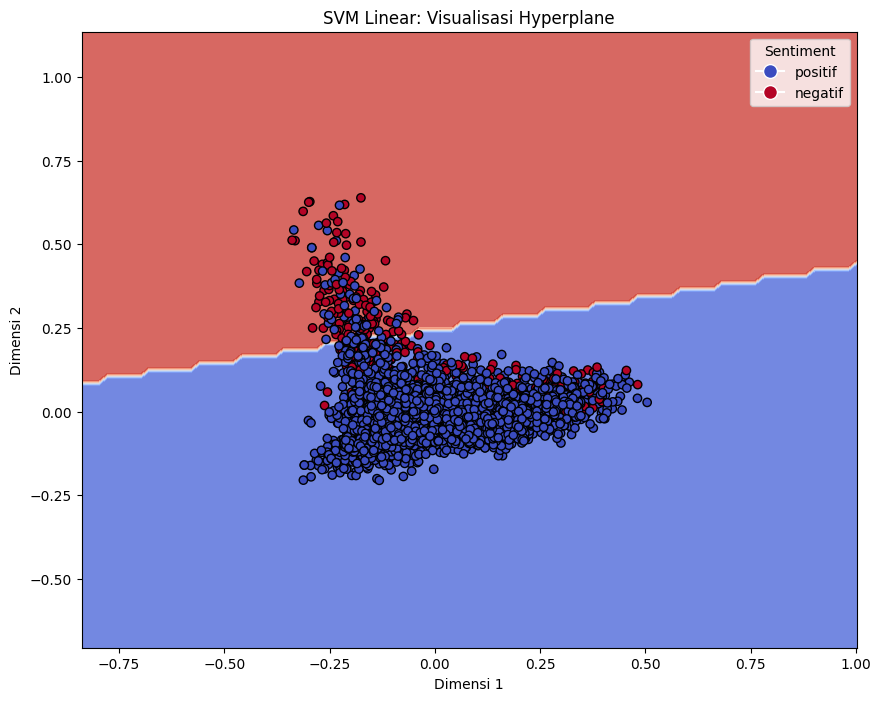

In [ ]:
# prompt: import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import LinearSVC
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import numpy as np
# # Load the CSV file
# df = pd.read_csv('ulasan_borobudur_labeled_2kelas.csv', sep=';')
# # Filter data to include only 'positif' and 'negatif' sentiments for visualization
# df_filtered = df[df['sentiment'].isin(['positif', 'negatif'])].copy()
# X_filtered = df_filtered['ulasan']
# y_filtered = df_filtered['sentiment']
# # Split data (optional, but good practice to work with train/test splits)
# # For visualization purposes on the whole filtered dataset, we can skip train_test_split
# # or apply PCA and visualize on the test set if split is desired.
# # Let's visualize the decision boundary based on the whole filtered dataset for clarity.
# # Vektorisasi/pembobotan dengan TF-IDF on the filtered data
# vectorizer = TfidfVectorizer()
# X_filtered_vec = vectorizer.fit_transform(X_filtered)
# # Latih LinearSVC on the full TF-IDF data (as before)
# svm_model = LinearSVC()
# svm_model.fit(X_filtered_vec, y_filtered)
# # --- Visualisasi Hyperplane SVM ---
# # Reduce dimensionality using PCA to 2 components for visualization
# pca = PCA(n_components=2)
# X_filtered_pca = pca.fit_transform(X_filtered_vec.toarray()) # Convert sparse matrix to dense array
# # Map filtered labels to numeric values for PCA model training and plotting
# label_map = {'positif': 1, 'negatif': 0} # Ensure lowercase keys match filtered data
# y_filtered_numeric = y_filtered.map(label_map)
# # Train a LinearSVC on the PCA-reduced data for visualization purposes
# # NOTE: This model is ONLY for visualizing the decision boundary in 2D PCA space.
# # The actual SVM model for prediction shoul
# dari kode diatas perbaiki dong mengenai sentiment jangan 0 dan 1, jadi positif dan negatif

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
df = pd.read_csv('ulasan_borobudur_labeled_2kelas.csv', sep=';')

# Filter data to include only 'positif' and 'negatif' sentiments for visualization
df_filtered = df[df['sentiment'].isin(['positif', 'negatif'])].copy()

X_filtered = df_filtered['ulasan']
y_filtered = df_filtered['sentiment']

# Split data (optional, but good practice to work with train/test splits)
# For visualization purposes on the whole filtered dataset, we can skip train_test_split
# or apply PCA and visualize on the test set if split is desired.
# Let's visualize the decision boundary based on the whole filtered dataset for clarity.

# Vektorisasi/pembobotan dengan TF-IDF on the filtered data
vectorizer = TfidfVectorizer()
X_filtered_vec = vectorizer.fit_transform(X_filtered)

# Latih LinearSVC on the full TF-IDF data (as before)
svm_model = LinearSVC()
svm_model.fit(X_filtered_vec, y_filtered)

# --- Visualisasi Hyperplane SVM ---

# Reduce dimensionality using PCA to 2 components for visualization
pca = PCA(n_components=2)
X_filtered_pca = pca.fit_transform(X_filtered_vec.toarray()) # Convert sparse matrix to dense array

# Train a LinearSVC on the PCA-reduced data for visualization purposes
# NOTE: This model is ONLY for visualizing the decision boundary in 2D PCA space.
# The actual SVM model for prediction should be trained on the full TF-IDF data (svm_model above).
svm_model_pca = LinearSVC()
# We train on the original string labels for visualization purposes in this part
# as the scatter plot will use these labels directly.
svm_model_pca.fit(X_filtered_pca, y_filtered)


# Create a grid to visualize the decision boundary
x_min, x_max = X_filtered_pca[:, 0].min() - 0.5, X_filtered_pca[:, 0].max() + 0.5
y_min, y_max = X_filtered_pca[:, 1].min() - 0.5, X_filtered_pca[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on the grid points using the SVM model trained on PCA data
# Need to map string labels back to numeric for the contour plot if predict returns strings
# Or train the svm_model_pca on numeric labels and use those here.
# Let's use the numeric mapping for the contour prediction consistent with how PCA models often work
label_map_numeric = {'positif': 0, 'negatif': 1}
# Train a separate model for the contour plot that uses numeric labels
svm_model_pca_numeric = LinearSVC()
svm_model_pca_numeric.fit(X_filtered_pca, y_filtered.map(label_map_numeric))

Z_numeric = svm_model_pca_numeric.predict(np.c_[xx.ravel(), yy.ravel()])
Z_numeric = Z_numeric.reshape(xx.shape)

# Plot the contour lines (decision boundary) and the data points
plt.figure(figsize=(10, 8))

# Use the numeric predictions Z_numeric for contour plot
plt.contourf(xx, yy, Z_numeric, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the data points using the original string labels
# Need to map string labels to numeric for the scatter plot's 'c' argument
scatter_c = y_filtered.map(label_map_numeric)
scatter = plt.scatter(X_filtered_pca[:, 0], X_filtered_pca[:, 1], c=scatter_c, cmap=plt.cm.coolwarm, edgecolors='k')

plt.xlabel('Dimensi 1')
plt.ylabel('Dimensi 2')
plt.title('SVM Linear: Visualisasi Hyperplane')


# Create a legend based on the original sentiment labels ('positif', 'negatif')
unique_labels = y_filtered.unique()
# Get colors that correspond to 'positif' and 'negatif' from the colormap used for the scatter plot
# We need to know which numeric value maps to which string label.
# Based on label_map_numeric, 1 is 'positif' and 0 is 'negatif'.
# The colormap 'coolwarm' typically has the first value (0) as one color and the second (1) as another.
# Let's manually define colors for clarity if needed, or rely on the cmap's mapping.
# If cmap is coolwarm, 0 might be red/blueish and 1 might be yellowish/orangeish.
# We can directly use the original unique labels and their corresponding colors from the scatter plot.
# Find the colors used by the scatter plot for each unique label
legend_elements = []
for label_str, label_num in label_map_numeric.items():
    color = scatter.cmap(scatter.norm(label_num))
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=label_str,
                                      markerfacecolor=color, markersize=10))

plt.legend(handles=legend_elements, title='Sentiment')


plt.show()


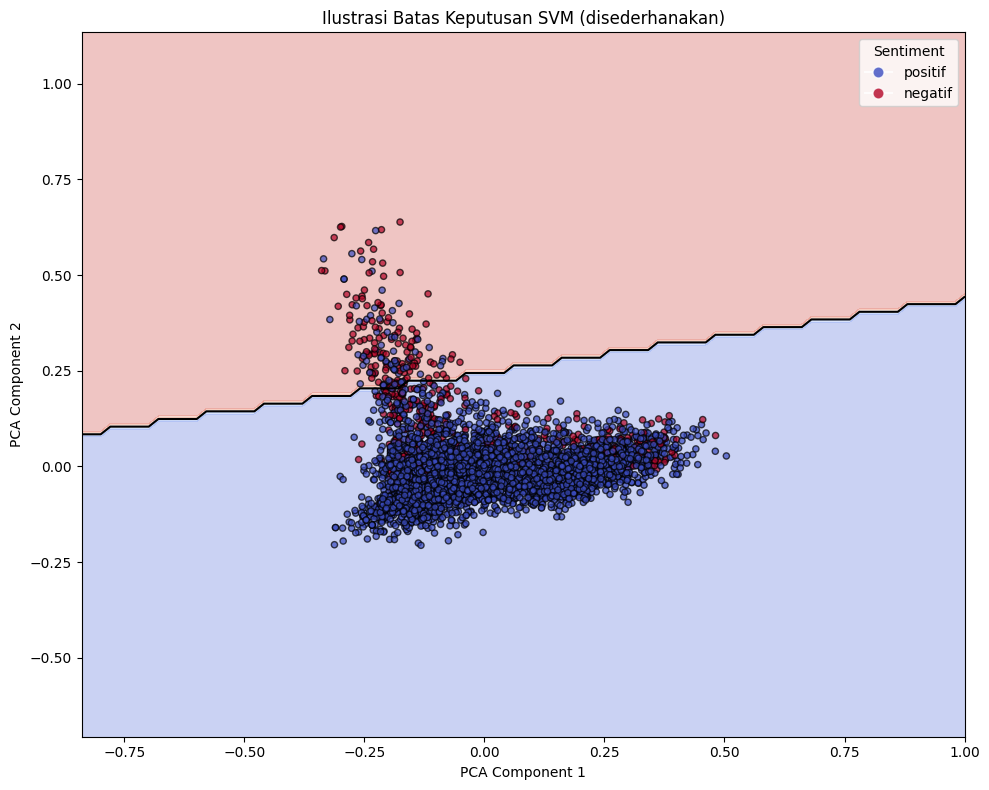

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
df = pd.read_csv('ulasan_borobudur_labeled_2kelas.csv', sep=';')

# Filter data to include only 'positif' and 'negatif' sentiments for visualization
df_filtered = df[df['sentiment'].isin(['positif', 'negatif'])].copy()
X_filtered = df_filtered['ulasan']
y_filtered = df_filtered['sentiment']

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_filtered_vec = vectorizer.fit_transform(X_filtered)

# Train LinearSVC on the full TF-IDF data
svm_model = LinearSVC()
svm_model.fit(X_filtered_vec, y_filtered)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_filtered_pca = pca.fit_transform(X_filtered_vec.toarray())

# Mapping labels to numeric
label_map_numeric = {'positif': 0, 'negatif': 1}
scatter_c = y_filtered.map(label_map_numeric)

# Train model on PCA data for visualization
svm_model_pca_numeric = LinearSVC()
svm_model_pca_numeric.fit(X_filtered_pca, scatter_c)

# Create meshgrid for decision boundary
x_min, x_max = X_filtered_pca[:, 0].min() - 0.5, X_filtered_pca[:, 0].max() + 0.5
y_min, y_max = X_filtered_pca[:, 1].min() - 0.5, X_filtered_pca[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z_numeric = svm_model_pca_numeric.predict(np.c_[xx.ravel(), yy.ravel()])
Z_numeric = Z_numeric.reshape(xx.shape)

# --- Final Visualisasi Disederhanakan ---
plt.figure(figsize=(10, 8))

# Soft background
plt.contourf(xx, yy, Z_numeric, cmap=plt.cm.coolwarm, alpha=0.3)

# Decision boundary line
plt.contour(xx, yy, Z_numeric, levels=[0.5], colors='k', linewidths=1.5)

# Scatter plot with smaller, semi-transparent points
scatter = plt.scatter(
    X_filtered_pca[:, 0], X_filtered_pca[:, 1],
    c=scatter_c, cmap=plt.cm.coolwarm,
    edgecolors='k', s=20, alpha=0.7
)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Ilustrasi Batas Keputusan SVM (disederhanakan)')

# Custom legend
legend_elements = []
for label_str, label_num in label_map_numeric.items():
    color = scatter.cmap(scatter.norm(label_num))
    legend_elements.append(plt.Line2D(
        [0], [0], marker='o', color='w', label=label_str,
        markerfacecolor=color, markersize=8, alpha=0.8
    ))

plt.legend(handles=legend_elements, title='Sentiment')
plt.tight_layout()
plt.show()


=== Naive Bayes ===
[[  3 147]
 [  0 719]]
              precision    recall  f1-score   support

     negatif       1.00      0.02      0.04       150
     positif       0.83      1.00      0.91       719

    accuracy                           0.83       869
   macro avg       0.92      0.51      0.47       869
weighted avg       0.86      0.83      0.76       869



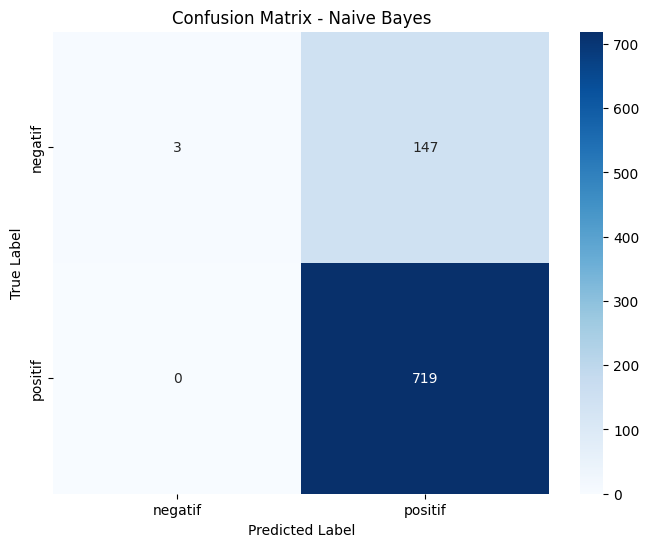

=== SVM ===
[[ 82  68]
 [ 35 684]]
              precision    recall  f1-score   support

     negatif       0.70      0.55      0.61       150
     positif       0.91      0.95      0.93       719

    accuracy                           0.88       869
   macro avg       0.81      0.75      0.77       869
weighted avg       0.87      0.88      0.88       869



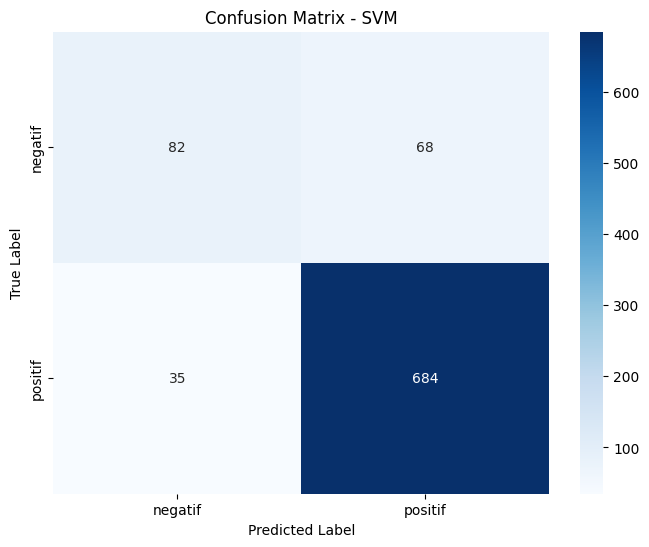

In [ ]:
# prompt: import pandas as pd
# df = pd.read_csv('ulasan_borobudur_labeled_2kelas.csv', sep=';')
# X = df['ulasan']  # atau 'text_stemmed', sesuai yang ingin kamu pakai
# y = df['sentiment']
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y)
# from sklearn.feature_extraction.text import TfidfVectorizer
# # Inisialisasi vectorizer
# vectorizer = TfidfVectorizer()
# # Fit dan transform data training, lalu transform data test
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import classification_report, confusion_matrix
# nb_model = MultinomialNB()
# nb_model.fit(X_train_vec, y_train)
# y_pred_nb = nb_model.predict(X_test_vec)
# print("=== Naive Bayes ===")
# print(confusion_matrix(y_test, y_pred_nb))
# print(classification_report(y_test, y_pred_nb))
# from sklearn.svm import LinearSVC
# svm_model = LinearSVC()
# svm_model.fit(X_train_vec, y_train)
# y_pred_svm = svm_model.predict(X_test_vec)
# print("=== SVM ===")
# print(confusion_matrix(y_test, y_pred_svm))
# print(classification_report(y_test, y_pred_svm))
# dari kode ini tambahkan visualisasi confusion matrix naive bayes dan svm

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('ulasan_borobudur_labeled_2kelas.csv', sep=';')

# Define features and labels
X = df['ulasan']
y = df['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Vektorisasi/pembobotan dengan TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# --- Naive Bayes Model ---
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)

print("=== Naive Bayes ===")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Visualisasi Confusion Matrix Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# --- SVM Model ---
svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)
y_pred_svm = svm_model.predict(X_test_vec)

print("=== SVM ===")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Visualisasi Confusion Matrix SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

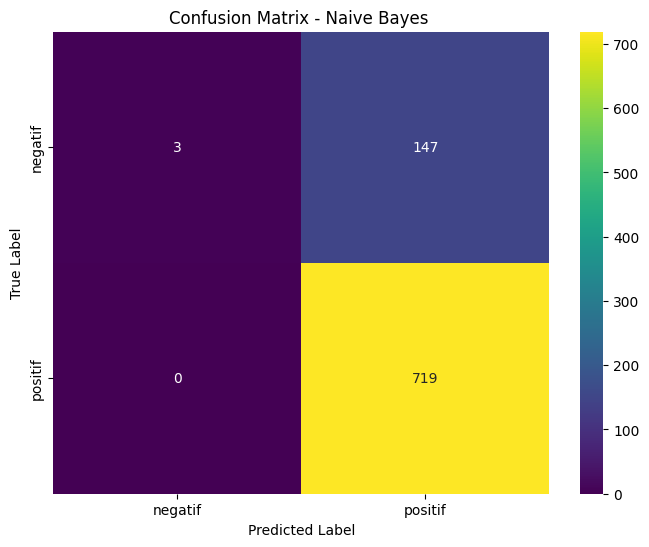

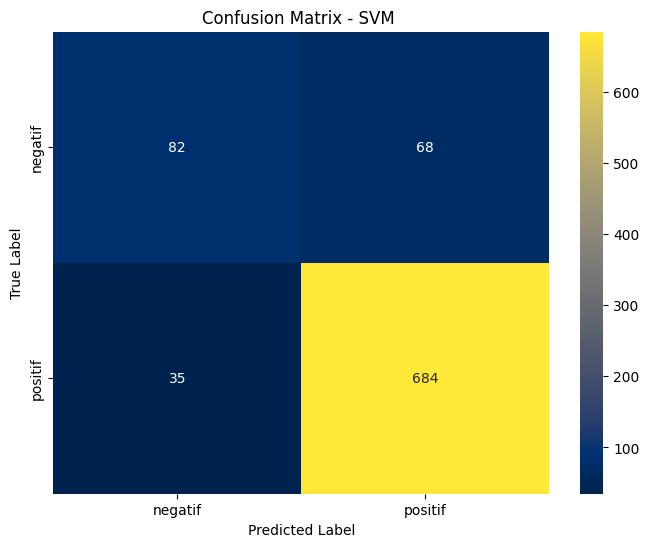

In [ ]:

# Visualisasi Confusion Matrix Naive Bayes dengan 4 warna
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))

# A simpler approach to get visually distinct quadrants with a standard cmap
# is to use a cmap like 'viridis', 'plasma', 'inferno', or 'cividis'
# that provides a sequential color gradient. 'Blues' is one, let's try 'viridis'.
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="viridis", xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Confusion Matrix - Naive Bayes ")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualisasi Confusion Matrix SVM dengan 4 warna
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
# Applying the same 'viridis' cmap to the SVM confusion matrix
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="cividis", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Confusion Matrix - SVM ")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()





In [ ]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 13.1 MB/s eta 0:00:00


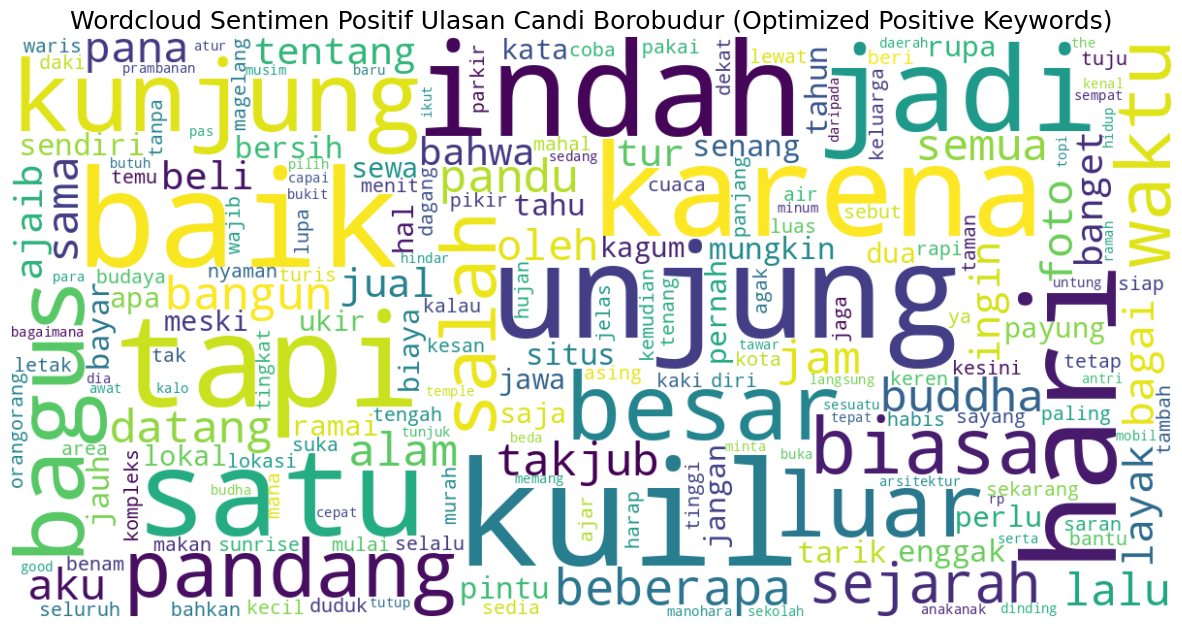

In [ ]:
!pip install pandas wordcloud matplotlib Sastrawi

import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# --- 1. Load Data (Pastikan file CSV Anda ada di lokasi yang benar) ---
try:
    df_labeled_2kelas = pd.read_csv('ulasan_borobudur_labeled_2kelas.csv', sep=';')
except FileNotFoundError:
    print("Error: File 'ulasan_borobudur_labeled_2kelas.csv' tidak ditemukan.")
    print("Pastikan file CSV Anda berada di direktori yang sama dengan script ini atau berikan path lengkap.")
    exit()

# --- 2. Inisialisasi Stemmer Sastrawi ---
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# --- 3. Definisi Stopwords (Lebih Agresif untuk Menekankan Kata Positif) ---
stop_words_id = set([
    # Stopwords standar bahasa Indonesia (umumnya sudah ada)
    "yang", "dan", "di", "dari", "dengan", "untuk", "ini", "itu", "adalah",
    "akan", "ada", "saya", "kami", "mereka", "kita", "bisa", "tidak", "sudah",
    "saat", "jika", "juga", "atau", "seperti", "pada", "ke", "dalam", "nya",
    "pun", "masih", "belum", "sangat", "begitu", "hanya", "tetapi", "sehingga",
    "lagi", "cukup", "lebih", "kurang", "setelah", "dapat", "pergi", "masuk",
    "sekitar", "awal", "akhir", "lama", "dulu", "kembali", "terus",
    "benar", "benarbenar", "berada", "terutama", "utama", "mengunjungi", # "kunjung" akan menjadi stem-nya, ini bisa dipertahankan sebagai stopword
    "naik", "turun", "anak", "batu", "patung", "relief", "stupa", # Objek-objek spesifik candi yang mungkin tidak selalu berkonotasi sentimen
    "jogja", "yogyakarta", "indonesia", "milik", # Lokasi geografis
    "suasana", "tempat", "candi", "borobudur", # Konteks utama, jika terlalu sering muncul
    "kulit", "rasa", "tiket", "wisatawan", "pengunjung", # Umum/ambigu
    "rekomendasi", "tiba", "guna", "keliling", "ambil", "gambar", "cerita", # Kata kerja/benda umum
    "pagi", "terbit", "matahari", "hotel", "wisata", "dunia", "puncak", "gunung", # Konteks waktu/lokasi umum
    "sana", "sini", "situ", "banyak", "harus", "anda", "orang", "jalan", "harga", # Kata umum/penunjuk
    "telah", "bagi", "sampai", "lain", "kali", "namun", "ketika", "siang", "sore", "malam",
    "terlalu", "keluar", "balik", "pasti", "bawa", "tinggal", "tujuan", "sekali", "seru",
    "pemandangan", "udara", # Meskipun positif, jika terlalu umum bisa disaring
    "libur", "nikmat", # Jika ini bukan fokus utama sentimen "bagus/indah", bisa disaring
    "lihat", "buat", "tadi", "buah", "laku", # Kata kerja/benda umum yang sering muncul
    "mudah", "cara", "penuh", "pertama", "sedikit", "tangga", "komplek", # Kata sifat/benda yang netral
    "tiap", "beliau", "megah", "atas", "bawah", "depan", "belakang", "kiri", "kanan" # Penunjuk posisi/frekuensi
    # Penting: Kata "kunjung" (hasil stemming dari mengunjungi, kunjungan, dll.)
    # Jika Anda ingin "kunjung" tidak terlalu dominan dan fokus ke kata sifatnya, masukkan "kunjung" di sini
    # Tetapi jika "kunjung" (sebagai tindakan positif datang) adalah yang Anda inginkan, jangan masukkan
])

# --- 4. Fungsi Preprocessing Teks ---
def preprocess_text(text):
    text = str(text).lower()  # Case folding
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = re.sub(r'\d+', '', text)  # Hapus angka
    words = text.split()

    # Stemming setiap kata
    stemmed_words = [stemmer.stem(word) for word in words]

    # Filter stopwords setelah stemming
    filtered_words = [word for word in stemmed_words if word not in stop_words_id]

    return ' '.join(filtered_words)

# --- 5. Filter Ulasan Positif dan Terapkan Preprocessing ---
positive_reviews = df_labeled_2kelas[df_labeled_2kelas['sentiment'] == 'positif']['ulasan']

# Gabungkan semua ulasan positif menjadi satu string setelah preprocessing
processed_positive_text = ' '.join(positive_reviews.astype(str).apply(preprocess_text))

# --- 6. Buat dan Tampilkan WordCloud ---
if processed_positive_text.strip() == "":
    print("Tidak ada ulasan positif yang tersisa setelah preprocessing untuk membuat wordcloud.")
else:
    wordcloud = WordCloud(
        width=1200,           # Diperbesar lagi untuk detail lebih baik
        height=600,           # Diperbesar lagi
        random_state=21,
        max_font_size=150,    # Sesuaikan ukuran font maksimum
        min_font_size=10,     # Atur ukuran font minimum untuk kata jarang
        background_color="white",
        collocations=False,   # Tetap matikan
        stopwords=stop_words_id, # Pastikan ini digunakan
        regexp=r"\w[\w']+"
    ).generate(processed_positive_text)

    plt.figure(figsize=(15, 9)) # Ukuran figure diperbesar
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title('Wordcloud Sentimen Positif Ulasan Candi Borobudur (Optimized Positive Keywords)', fontsize=18)
    plt.show()

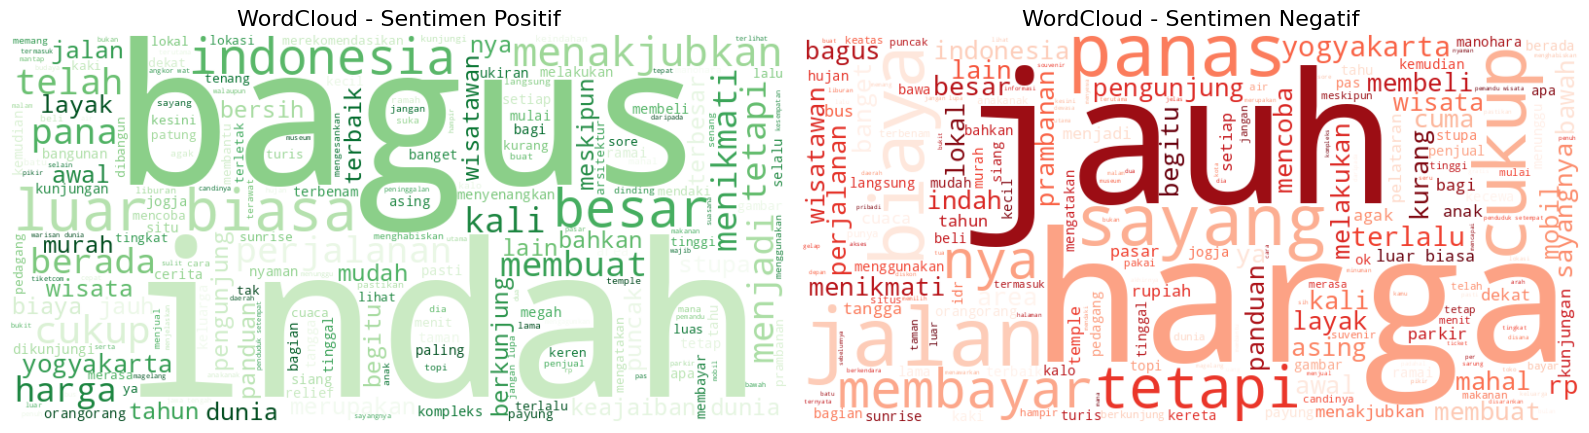

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load data (jika belum)
df = pd.read_csv('ulasan_borobudur_labeled_2kelas.csv', sep=';')

# Stopwords tambahan Bahasa Indonesia
# Define custom_stopwords BEFORE using it
custom_stopwords = [
    'saya', 'kami', 'kita', 'anda', 'mereka',
    'tempat', 'candi', 'borobudur', 'kuil',
    'matahari', 'terbit', 'tidak', 'tapi', 'jika', 'sudah',
    'ada', 'bisa', 'hanya', 'lagi', 'melihat', 'pergi',
    'hotel', 'pagi', 'sekitar', 'sini', 'sana', 'lebih',
    'harus', 'masuk', 'hari', 'waktu', 'dapat', 'atas',
    'saat', 'jam', 'mendapatkan', 'setelah', 'salah', 'satu',
    'ketika', 'sendiri', 'mungkin', 'tersebut', 'juga', 'semua',
    'memiliki', 'benar', 'oleh', 'seperti', 'tur', 'datang',
    'saja', 'hingga', 'masih', 'naik', 'benarbenar', 'banyak'
    'yang', 'di', 'ke', 'dari', 'dalam', 'untuk', 'pada', 'ini',
    'itu', 'dengan', 'adalah', 'akan', 'atau', 'dan', 'karena', 'sebuah',
    'seorang', 'para', 'namun', 'agar', 'bahwa', 'sebab', 'sehingga',
    'sejak', 'antara', 'kepada', 'oleh', 'sebagai', 'sebelum', 'sesudah',
    'selama', 'sehabis', 'sebaiknya', 'sekali', 'terus', 'tentu', 'tentang',
    'terhadap', 'tanpa', 'melalui', 'mengenai', 'sedang', 'sekarang',
    'nanti', 'tadi', 'besok', 'kemarin', 'lusa', 'baru', 'pernah',
    'ingin', 'mau', 'musti', 'perlu', 'boleh', 'dulu', 'baru', 'pernah',
    'ingin', 'mau', 'musti', 'perlu', 'boleh', 'dulu', 'pernah', 'kembali',
    'mula', 'pertama', 'akhir', 'terakhir', 'belum', 'sudahkah', 'apakah',
    'siapakah', 'dimana', 'kemana', 'darimana', 'berapa', 'bagaimana',
    'kenapa', 'mengapa', 'siapapun', 'apapun', 'kapanpun', 'bagaimanapun',
    'manapun', 'sedikit', 'banyak', 'semua', 'sebagian', 'kebanyakan',
    'sepenuhnya', 'masing-masing', 'sendiri-sendiri', 'saling', 'bersama',
    'sendirian', 'berdua', 'bertiga', 'berempat', 'sendiri', 'orang',
    'benda', 'hal', 'barang', 'sesuatu', 'seseorang', 'beberapa',
    'segala', 'segalanya', 'seluruh', 'seluruhnya', 'sebaik', 'seburuk',
    'sejelek', 'seindah', 'secantik', 'sebesar', 'sekecil', 'setinggi',
    'serendah', 'sejauh', 'sedekat', 'secepat', 'selambat', 'sebanyak',
    'sesedikit', 'seperti', 'serupa', 'sama', 'berbeda', 'bermacam',
    'beragam', 'bervariasi', 'berwarna-warni', 'berbeda-beda', 'berulang',
    'berkali-kali', 'bertingkat', 'berjenjang', 'berderet', 'berbaris',
    'berkelompok', 'berkumpul', 'berpisah', 'berserakan', 'berhamburan',
    'bertebaran', 'berjatuhan', 'berdiri', 'duduk', 'berbaring', 'tidur',
    'terbang', 'berenang', 'berlari', 'berjalan', 'berhenti', 'bergerak',
    'berputar', 'berbalik', 'maju', 'mundur', 'naik', 'turun', 'masuk',
    'keluar', 'datang', 'pergi', 'menuju', 'meninggalkan', 'tiba',
    'sampai', 'berangkat', 'pulang', 'kembali', 'melintas', 'melewati',
    'menyeberang', 'menyusuri', 'mengikuti', 'mengejar', 'menghindari',
    'menyentuh', 'memegang', 'melepaskan', 'mengangkat', 'menurunkan',
    'mendorong', 'menarik', 'memutar', 'membuka', 'menutup', 'memasukkan',
    'mengeluarkan', 'mengisi', 'mengosongkan', 'mengganti', 'memakai',
    'melepas', 'mengenakan', 'membawa', 'mengambil', 'memberikan',
    'menerima', 'mengirim', 'mengembalikan', 'menyimpan', 'membuang',
    'mencari', 'menemukan', 'kehilangan', 'mendapat', 'memberi', 'mengambil',
    'melihat', 'mendengar', 'merasakan', 'mencium', 'mengecap', 'menyentuh',
    'berbicara', 'berkata', 'berteriak', 'berbisik', 'menjawab','aku',
    'enggak', 'orang', 'sama','mengunjungi','kalau', 'jadi','tiket', 'pintu',
    'sejarah', 'komplek', 'bangun', 'buddha',
    'foto', 'pengalaman', 'pemandangan',]

stopwords_id = set(STOPWORDS)
stopwords_id.update(custom_stopwords) # Now custom_stopwords is defined
stopwords_id.update([
    'yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'dengan',
    'pada', 'adalah', 'itu', 'ini', 'sangat', 'akan', 'juga',
    'karena', 'atau', 'sudah', 'sebagai', 'dalam'
])

# Gabungkan semua teks berdasarkan sentimen
text_positif = ' '.join(df[df['sentiment'] == 'positif']['ulasan'].astype(str))
text_negatif = ' '.join(df[df['sentiment'] == 'negatif']['ulasan'].astype(str))

# Buat WordCloud untuk masing-masing
wordcloud_pos = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=stopwords_id,
    colormap='Greens'
).generate(text_positif)

wordcloud_neg = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=stopwords_id,
    colormap='Reds'
).generate(text_negatif)

# Tampilkan berdampingan
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Sentimen Positif", fontsize=16)

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Sentimen Negatif", fontsize=16)

plt.tight_layout()
plt.show()

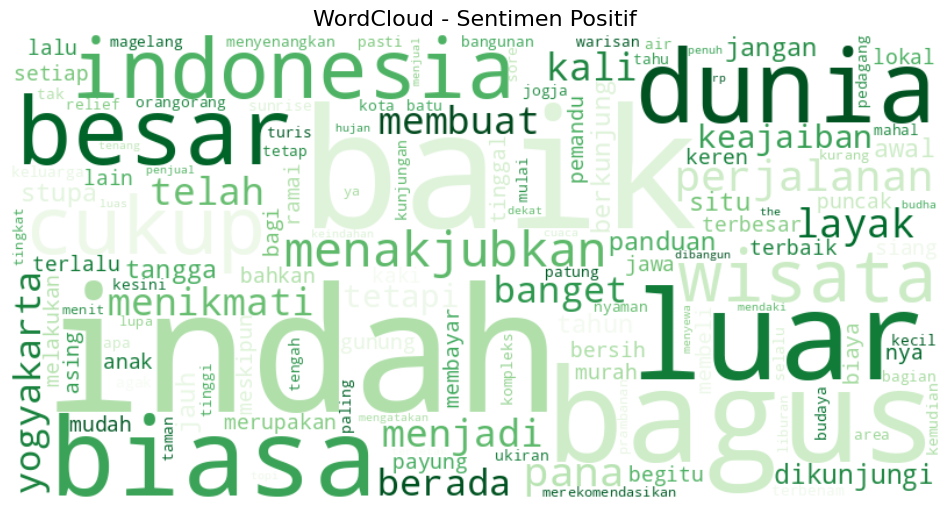

In [ ]:
# --- Kode untuk WordCloud Sentimen Positif ---

!pip install pandas wordcloud matplotlib

import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- 1. Load Data (Pastikan file CSV Anda ada di lokasi yang benar) ---
try:
    df = pd.read_csv('ulasan_borobudur_labeled_2kelas.csv', sep=';')
except FileNotFoundError:
    print("Error: File 'ulasan_borobudur_labeled_2kelas.csv' tidak ditemukan.")
    print("Pastikan file CSV Anda berada di direktori yang sama dengan script ini atau berikan path lengkap.")
    exit()

# --- 2. Definisi Stopwords Dasar ---
# Ini adalah daftar stopwords yang akan berlaku untuk kedua sentimen (positif & negatif).
# Karena TIDAK menggunakan Sastrawi, pastikan stopwords di sini mencakup SEMUA VARIASI KATA
# (misal: "mengunjungi", "kunjungan", "dikunjungi", dll. jika ingin disaring).
base_stopwords = set([
    'yang', 'dan', 'di', 'dari', 'dengan', 'untuk', 'ini', 'itu', 'adalah',
    'akan', 'ada', 'saya', 'kami', 'kita', 'anda', 'mereka', 'aku', 'enggak',
    'bisa', 'tidak', 'tapi', 'jika', 'sudah', 'hanya', 'lagi', 'melihat',
    'pergi', 'hotel', 'pagi', 'sekitar', 'sini', 'sana', 'lebih', 'harus',
    'masuk', 'hari', 'waktu', 'dapat', 'atas', 'saat', 'jam', 'mendapatkan',
    'setelah', 'salah', 'satu', 'ketika', 'sendiri', 'mungkin', 'tersebut',
    'juga', 'semua', 'memiliki', 'benar', 'oleh', 'seperti', 'tur', 'datang',
    'saja', 'hingga', 'masih', 'naik', 'benarbenar', 'banyak', 'ke', 'dalam',
    'pada', 'atau', 'karena', 'sebuah', 'seorang', 'para', 'namun', 'agar',
    'bahwa', 'sebab', 'sehingga', 'sejak', 'antara', 'kepada', 'sebagai',
    'sebelum', 'sesudah', 'selama', 'sehabis', 'sebaiknya', 'sekali', 'terus',
    'tentu', 'tentang', 'terhadap', 'tanpa', 'melalui', 'mengenai', 'sedang',
    'sekarang', 'nanti', 'tadi', 'besok', 'kemarin', 'lusa', 'baru', 'pernah',
    'ingin', 'mau', 'musti', 'perlu', 'boleh', 'dulu', 'kembali', 'mula',
    'pertama', 'akhir', 'terakhir', 'belum', 'sudahkah', 'apakah', 'siapakah',
    'dimana', 'kemana', 'darimana', 'berapa', 'bagaimana', 'kenapa', 'mengapa',
    'siapapun', 'apapun', 'kapanpun', 'bagaimanapun', 'manapun', 'sedikit',
    'sebagian', 'kebanyakan', 'sepenuhnya', 'masing-masing', 'sendiri-sendiri',
    'saling', 'bersama', 'sendirian', 'berdua', 'bertiga', 'berempat', 'orang',
    'benda', 'hal', 'barang', 'sesuatu', 'seseorang', 'beberapa', 'segala',
    'segalanya', 'seluruh', 'seluruhnya', 'sebaik', 'seburuk', 'sejelek',
    'seindah', 'secantik', 'sebesar', 'sekecil', 'setinggi', 'serendah',
    'sejauh', 'sedekat', 'secepat', 'selambat', 'sebanyak', 'sesedikit',
    'serupa', 'sama', 'berbeda', 'bermacam', 'beragam', 'bervariasi',
    'berwarna-warni', 'berbeda-beda', 'berulang', 'berkali-kali', 'bertingkat',
    'berjenjang', 'berderet', 'berbaris', 'berkelompok', 'berkumpul',
    'berpisah', 'berserakan', 'berhamburan', 'bertebaran', 'berjatuhan',
    'berdiri', 'duduk', 'berbaring', 'tidur', 'terbang', 'berenang', 'berlari',
    'berjalan', 'berhenti', 'bergerak', 'berputar', 'berbalik', 'maju',
    'mundur', 'naik', 'turun', 'masuk', 'keluar', 'datang', 'menuju',
    'meninggalkan', 'tiba', 'sampai', 'berangkat', 'pulang', 'kembali',
    'melintas', 'melewati', 'menyeberang', 'menyusuri', 'mengikuti',
    'mengejar', 'menghindari', 'menyentuh', 'memegang', 'melepaskan',
    'mengangkat', 'menurunkan', 'mendorong', 'menarik', 'memutar', 'membuka',
    'menutup', 'memasukkan', 'mengeluarkan', 'mengisi', 'mengosongkan',
    'mengganti', 'memakai', 'melepas', 'mengenakan', 'membawa', 'mengambil',
    'memberikan', 'menerima', 'mengirim', 'mengembalikan', 'menyimpan',
    'membuang', 'mencari', 'menemukan', 'kehilangan', 'mendapat', 'memberi',
    'melihat', 'mendengar', 'merasakan', 'mencium', 'mengecap', 'berbicara',
    'berkata', 'berteriak', 'berbisik', 'menjawab', 'mengunjungi', 'kunjung', # Tambahkan variasi kata jika tidak stemming
    'kalau', 'jadi', 'tempat', 'candi', 'borobudur', 'kuil', 'matahari', 'terbit',
    'pemandangan', 'udara', 'libur', 'nikmat', 'buah', 'laku', 'megah',
    'wisatawan', 'pengunjung', 'wajib', 'rekomendasi', 'cerita',
    'sejarah', 'komplek', 'bangun', 'buddha', # Jika tidak pakai stemming, pertahankan bentuk lengkapnya
    'foto', 'pengalaman', 'tiket', 'pintu', 'harga', 'jalan', 'kulit', 'rasa',
    'view', 'sangat' # Tambahan kata yang mungkin terlalu umum/netral di kedua sentimen
])

# --- 3. Fungsi Preprocessing Teks (Tanpa Stemming) ---
def preprocess_text(text, stopwords_set):
    text = str(text).lower()  # Case folding
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = re.sub(r'\d+', '', text)  # Hapus angka
    words = text.split()

    # Filter stopwords saja, tidak ada stemming
    filtered_words = [word for word in words if word not in stopwords_set]

    return ' '.join(filtered_words)

# --- 4. Siapkan Teks untuk WordCloud Positif ---
positive_reviews = df[df['sentiment'] == 'positif']['ulasan']
processed_positive_text = ' '.join(positive_reviews.astype(str).apply(lambda x: preprocess_text(x, base_stopwords)))

# --- 5. Buat dan Tampilkan WordCloud Positif ---
if processed_positive_text.strip() == "":
    print("Tidak ada ulasan positif yang tersisa setelah preprocessing.")
else:
    wordcloud_pos = WordCloud(
        width=800, height=400, # Sesuaikan ukuran jika perlu
        max_words=500,
        #max_font_size=120,
        #min_font_size=12,
        #random_state=21,
        max_font_size=150,
        min_font_size=10,
        background_color="white",
        collocations=False, # Pertahankan False jika hanya ingin kata tunggal
        colormap='Greens', # Warna hijau untuk positif
        stopwords=base_stopwords # Menggunakan stopwords dasar
    ).generate(processed_positive_text)

    plt.figure(figsize=(12, 8)) # Ukuran figure
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.axis('off')
    plt.title("WordCloud - Sentimen Positif", fontsize=16)
    plt.show()

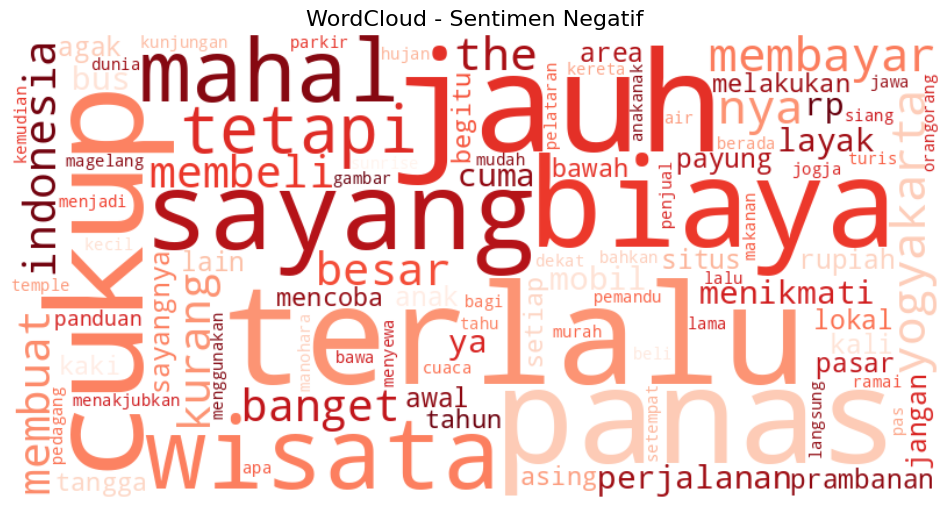

In [ ]:
# --- Kode untuk WordCloud Sentimen Negatif ---

!pip install pandas wordcloud matplotlib

import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- 1. Load Data (PENTING: Jika menjalankan terpisah, pastikan df dimuat lagi) ---
try:
    df = pd.read_csv('ulasan_borobudur_labeled_2kelas.csv', sep=';')
except FileNotFoundError:
    print("Error: File 'ulasan_borobudur_labeled_2kelas.csv' tidak ditemukan.")
    print("Pastikan file CSV Anda berada di direktori yang sama dengan script ini atau berikan path lengkap.")
    exit()

# --- 2. Definisi Stopwords Dasar (HARUS SAMA PERSIS dengan kode positif) ---
# Salin dan tempel daftar base_stopwords dari kode positif di sini.
base_stopwords = set([
    'yang', 'dan', 'di', 'dari', 'dengan', 'untuk', 'ini', 'itu', 'adalah',
    'akan', 'ada', 'saya', 'kami', 'kita', 'anda', 'mereka', 'aku', 'enggak',
    'bisa', 'tidak', 'tapi', 'jika', 'sudah', 'hanya', 'lagi', 'melihat',
    'pergi', 'hotel', 'pagi', 'sekitar', 'sini', 'sana', 'lebih', 'harus',
    'masuk', 'hari', 'waktu', 'dapat', 'atas', 'saat', 'jam', 'mendapatkan',
    'setelah', 'salah', 'satu', 'ketika', 'sendiri', 'mungkin', 'tersebut',
    'juga', 'semua', 'memiliki', 'benar', 'oleh', 'seperti', 'tur', 'datang',
    'saja', 'hingga', 'masih', 'naik', 'benarbenar', 'banyak', 'ke', 'dalam',
    'pada', 'atau', 'karena', 'sebuah', 'seorang', 'para', 'namun', 'agar',
    'bahwa', 'sebab', 'sehingga', 'sejak', 'antara', 'kepada', 'sebagai',
    'sebelum', 'sesudah', 'selama', 'sehabis', 'sebaiknya', 'sekali', 'terus',
    'tentu', 'tentang', 'terhadap', 'tanpa', 'melalui', 'mengenai', 'sedang',
    'sekarang', 'nanti', 'tadi', 'besok', 'kemarin', 'lusa', 'baru', 'pernah',
    'ingin', 'mau', 'musti', 'perlu', 'boleh', 'dulu', 'kembali', 'mula',
    'pertama', 'akhir', 'terakhir', 'belum', 'sudahkah', 'apakah', 'siapakah',
    'dimana', 'kemana', 'darimana', 'berapa', 'bagaimana', 'kenapa', 'mengapa',
    'siapapun', 'apapun', 'kapanpun', 'bagaimanapun', 'manapun', 'sedikit',
    'sebagian', 'kebanyakan', 'sepenuhnya', 'masing-masing', 'sendiri-sendiri',
    'saling', 'bersama', 'sendirian', 'berdua', 'bertiga', 'berempat', 'orang',
    'benda', 'hal', 'barang', 'sesuatu', 'seseorang', 'beberapa', 'segala',
    'segalanya', 'seluruh', 'seluruhnya', 'sebaik', 'seburuk', 'sejelek',
    'seindah', 'secantik', 'sebesar', 'sekecil', 'setinggi', 'serendah',
    'sejauh', 'sedekat', 'secepat', 'selambat', 'sebanyak', 'sesedikit',
    'serupa', 'sama', 'berbeda', 'bermacam', 'beragam', 'bervariasi',
    'berwarna-warni', 'berbeda-beda', 'berulang', 'berkali-kali', 'bertingkat',
    'berjenjang', 'berderet', 'berbaris', 'berkelompok', 'berkumpul',
    'berpisah', 'berserakan', 'berhamburan', 'bertebaran', 'berjatuhan',
    'berdiri', 'duduk', 'berbaring', 'tidur', 'terbang', 'berenang', 'berlari',
    'berjalan', 'berhenti', 'bergerak', 'berputar', 'berbalik', 'maju',
    'mundur', 'naik', 'turun', 'masuk', 'keluar', 'datang', 'menuju',
    'meninggalkan', 'tiba', 'sampai', 'berangkat', 'pulang', 'kembali',
    'melintas', 'melewati', 'menyeberang', 'menyusuri', 'mengikuti',
    'mengejar', 'menghindari', 'menyentuh', 'memegang', 'melepaskan',
    'mengangkat', 'menurunkan', 'mendorong', 'menarik', 'memutar', 'membuka',
    'menutup', 'memasukkan', 'mengeluarkan', 'mengisi', 'mengosongkan',
    'mengganti', 'memakai', 'melepas', 'mengenakan', 'membawa', 'mengambil',
    'memberikan', 'menerima', 'mengirim', 'mengembalikan', 'menyimpan',
    'membuang', 'mencari', 'menemukan', 'kehilangan', 'mendapat', 'memberi',
    'melihat', 'mendengar', 'merasakan', 'mencium', 'mengecap', 'berbicara',
    'berkata', 'berteriak', 'berbisik', 'menjawab', 'mengunjungi', 'kunjung',
    'kalau', 'jadi', 'tempat', 'candi', 'borobudur', 'kuil', 'matahari', 'terbit',
    'pemandangan', 'udara', 'libur', 'nikmat', 'buah', 'laku', 'megah',
    'wisatawan', 'pengunjung', 'wajib', 'rekomendasi', 'cerita',
    'sejarah', 'komplek', 'bangun', 'buddha',
    'foto', 'pengalaman', 'tiket', 'pintu', 'harga', 'jalan', 'kulit', 'rasa',
    'view','sangat'
])

# --- 5. Definisi Stopwords Khusus untuk Sentimen Negatif ---
# Tambahkan kata-kata di sini yang hanya ingin Anda saring dari WordCloud Negatif.
# Ini berguna untuk menyaring kata-kata positif/netral yang mungkin muncul di ulasan negatif
# sebagai konteks, bukan sebagai indikator sentimen negatif.
negative_specific_stopwords = set([
    "baik", "bagus", "indah", "bersih", "menarik",
    "keren", "amazing", "wow",
    "puas", "senang", "takjub", "luar", "biasa",
    "view", "keajaiban", "megah",
    "pemandangan", "udara", "hibur", "nikmat",
    # Ingat: "tiket", "jalan", "harga", "pintu" adalah KATA KUNCI NEGATIF
    # dari WordCloud sebelumnya. HANYA tambahkan mereka di sini jika Anda ingin
    # menyaringnya dari WordCloud negatif (misalnya, jika Anda merasa terlalu umum).
    # Saya TIDAK menyarankan menjadikan ini stopword untuk NEGATIF jika mereka
    # memang menunjukkan keluhan.
])

# Gabungkan stopwords dasar dengan stopwords khusus negatif
all_stopwords_for_negative = base_stopwords.union(negative_specific_stopwords)

# --- 6. Fungsi Preprocessing Teks (Tanpa Stemming) ---
def preprocess_text(text, stopwords_set):
    text = str(text).lower()  # Case folding
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = re.sub(r'\d+', '', text)  # Hapus angka
    words = text.split()

    # Filter stopwords saja, tidak ada stemming
    filtered_words = [word for word in words if word not in stopwords_set]

    return ' '.join(filtered_words)

# --- 7. Siapkan Teks untuk WordCloud Negatif ---
negative_reviews = df[df['sentiment'] == 'negatif']['ulasan']
processed_negative_text = ' '.join(negative_reviews.astype(str).apply(lambda x: preprocess_text(x, all_stopwords_for_negative)))

# --- 8. Buat dan Tampilkan WordCloud Negatif ---
if processed_negative_text.strip() == "":
    print("Tidak ada ulasan negatif yang tersisa setelah preprocessing.")
else:
    wordcloud_neg = WordCloud(
        width=800, height=400, # Sesuaikan ukuran jika perlu
        max_words=500,
        max_font_size=120,
        min_font_size=12,
        #random_state=21,
        #max_font_size=150,
        #min_font_size=10,
        background_color="white",
        collocations=False,
        colormap='Reds', # Warna merah untuk negatif
        stopwords=all_stopwords_for_negative # Menggunakan stopwords khusus negatif
    ).generate(processed_negative_text)

    plt.figure(figsize=(12, 8)) # Ukuran figure
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.axis('off')
    plt.title("WordCloud - Sentimen Negatif", fontsize=16)
    plt.show()

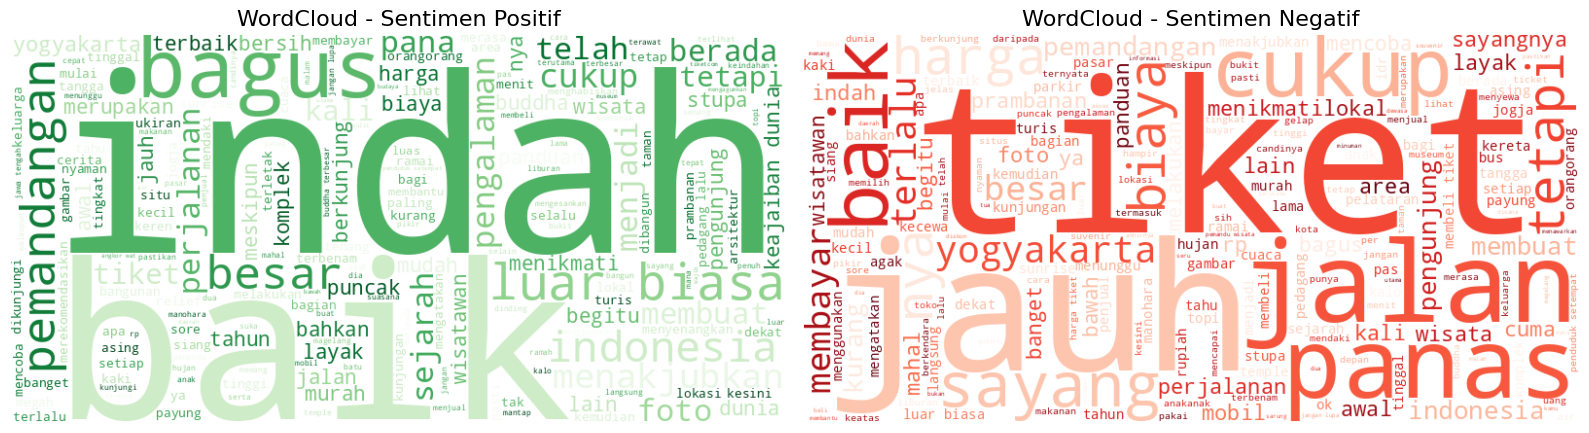

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load data (jika belum)
df = pd.read_csv('ulasan_borobudur_labeled_2kelas.csv', sep=';')

# Stopwords tambahan Bahasa Indonesia
custom_stopwords = [
    'saya', 'kami', 'kita', 'anda', 'mereka',
    'tempat', 'candi', 'borobudur', 'kuil',
    'matahari', 'terbit', 'tidak', 'tapi', 'jika', 'sudah',
    'ada', 'bisa', 'hanya', 'lagi', 'melihat', 'pergi',
    'hotel', 'pagi', 'sekitar', 'sini', 'sana', 'lebih',
    'harus', 'masuk', 'hari', 'waktu', 'dapat', 'atas',
    'saat', 'jam', 'mendapatkan', 'setelah', 'salah', 'satu',
    'ketika', 'sendiri', 'mungkin', 'tersebut', 'juga', 'semua',
    'memiliki', 'benar', 'oleh', 'seperti', 'tur', 'datang',
    'saja', 'hingga', 'masih', 'naik', 'benarbenar', 'banyak'
    'yang', 'di', 'ke', 'dari', 'dalam', 'untuk', 'pada', 'ini',
    'itu', 'dengan', 'adalah', 'akan', 'atau', 'dan', 'karena', 'sebuah',
    'seorang', 'para', 'namun', 'agar', 'bahwa', 'sebab', 'sehingga',
    'sejak', 'antara', 'kepada', 'oleh', 'sebagai', 'sebelum', 'sesudah',
    'selama', 'sehabis', 'sebaiknya', 'sekali', 'terus', 'tentu', 'tentang',
    'terhadap', 'tanpa', 'melalui', 'mengenai', 'sedang', 'sekarang',
    'nanti', 'tadi', 'besok', 'kemarin', 'lusa', 'baru', 'pernah',
    'ingin', 'mau', 'musti', 'perlu', 'boleh', 'dulu', 'baru', 'pernah',
    'ingin', 'mau', 'musti', 'perlu', 'boleh', 'dulu', 'pernah', 'kembali',
    'mula', 'pertama', 'akhir', 'terakhir', 'belum', 'sudahkah', 'apakah',
    'siapakah', 'dimana', 'kemana', 'darimana', 'berapa', 'bagaimana',
    'kenapa', 'mengapa', 'siapapun', 'apapun', 'kapanpun', 'bagaimanapun',
    'manapun', 'sedikit', 'banyak', 'semua', 'sebagian', 'kebanyakan',
    'sepenuhnya', 'masing-masing', 'sendiri-sendiri', 'saling', 'bersama',
    'sendirian', 'berdua', 'bertiga', 'berempat', 'sendiri', 'orang',
    'benda', 'hal', 'barang', 'sesuatu', 'seseorang', 'beberapa',
    'segala', 'segalanya', 'seluruh', 'seluruhnya', 'sebaik', 'seburuk',
    'sejelek', 'seindah', 'secantik', 'sebesar', 'sekecil', 'setinggi',
    'serendah', 'sejauh', 'sedekat', 'secepat', 'selambat', 'sebanyak',
    'sesedikit', 'seperti', 'serupa', 'sama', 'berbeda', 'bermacam',
    'beragam', 'bervariasi', 'berwarna-warni', 'berbeda-beda', 'berulang',
    'berkali-kali', 'bertingkat', 'berjenjang', 'berderet', 'berbaris',
    'berkelompok', 'berkumpul', 'berpisah', 'berserakan', 'berhamburan',
    'bertebaran', 'berjatuhan', 'berdiri', 'duduk', 'berbaring', 'tidur',
    'terbang', 'berenang', 'berlari', 'berjalan', 'berhenti', 'bergerak',
    'berputar', 'berbalik', 'maju', 'mundur', 'naik', 'turun', 'masuk',
    'keluar', 'datang', 'pergi', 'menuju', 'meninggalkan', 'tiba',
    'sampai', 'berangkat', 'pulang', 'kembali', 'melintas', 'melewati',
    'menyeberang', 'menyusuri', 'mengikuti', 'mengejar', 'menghindari',
    'menyentuh', 'memegang', 'melepaskan', 'mengangkat', 'menurunkan',
    'mendorong', 'menarik', 'memutar', 'membuka', 'menutup', 'memasukkan',
    'mengeluarkan', 'mengisi', 'mengosongkan', 'mengganti', 'memakai',
    'melepas', 'mengenakan', 'membawa', 'mengambil', 'memberikan',
    'menerima', 'mengirim', 'mengembalikan', 'menyimpan', 'membuang',
    'mencari', 'menemukan', 'kehilangan', 'mendapat', 'memberi', 'mengambil',
    'melihat', 'mendengar', 'merasakan', 'mencium', 'mengecap', 'menyentuh',
    'berbicara', 'berkata', 'berteriak', 'berbisik', 'menjawab','aku',
    'enggak', 'orang', 'sama','mengunjungi','kalau', 'jadi','pintu'
]

stopwords_id = set(STOPWORDS)
stopwords_id.update(custom_stopwords)
stopwords_id.update([
    'yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'dengan',
    'pada', 'adalah', 'itu', 'ini', 'sangat', 'akan', 'juga',
    'karena', 'atau', 'sudah', 'sebagai', 'dalam'
])

# Gabungkan semua teks berdasarkan sentimen
text_positif = ' '.join(df[df['sentiment'] == 'positif']['ulasan'].astype(str))
text_negatif = ' '.join(df[df['sentiment'] == 'negatif']['ulasan'].astype(str))

# Buat WordCloud untuk masing-masing dengan random_state
# Set random_state ke nilai integer apa pun (misalnya, 42)
wordcloud_pos = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=stopwords_id,
    colormap='Greens',
    random_state=42 # Tambahkan ini!
).generate(text_positif)

wordcloud_neg = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=stopwords_id,
    colormap='Reds',
    random_state=42 # Tambahkan ini!
).generate(text_negatif)

# Tampilkan berdampingan
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Sentimen Positif", fontsize=16)

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Sentimen Negatif", fontsize=16)

plt.tight_layout()
plt.show()

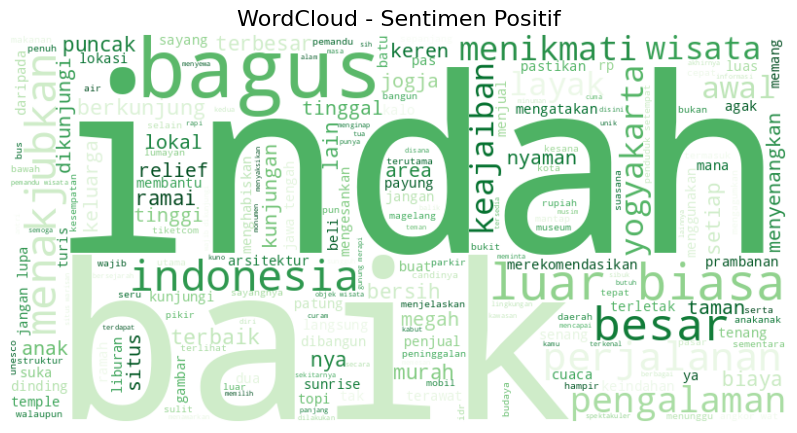

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load data (jika belum)
df = pd.read_csv('ulasan_borobudur_labeled_2kelas.csv', sep=';')

# Stopwords tambahan Bahasa Indonesia
custom_stopwords = [
    'saya', 'kami', 'kita', 'anda', 'mereka',
    'tempat', 'candi', 'borobudur', 'kuil',
    'matahari', 'terbit', 'tidak', 'tapi', 'jika', 'sudah',
    'ada', 'bisa', 'hanya', 'lagi', 'melihat', 'pergi',
    'hotel', 'pagi', 'sekitar', 'sini', 'sana', 'lebih',
    'harus', 'masuk', 'hari', 'waktu', 'dapat', 'atas',
    'saat', 'jam', 'mendapatkan', 'setelah', 'salah', 'satu',
    'ketika', 'sendiri', 'mungkin', 'tersebut', 'juga', 'semua',
    'memiliki', 'benar', 'oleh', 'seperti', 'tur', 'datang',
    'saja', 'hingga', 'masih', 'naik', 'benarbenar', 'banyak'
    'yang', 'di', 'ke', 'dari', 'dalam', 'untuk', 'pada', 'ini',
    'itu', 'dengan', 'adalah', 'akan', 'atau', 'dan', 'karena', 'sebuah',
    'seorang', 'para', 'namun', 'agar', 'bahwa', 'sebab', 'sehingga',
    'sejak', 'antara', 'kepada', 'oleh', 'sebagai', 'sebelum', 'sesudah',
    'selama', 'sehabis', 'sebaiknya', 'sekali', 'terus', 'tentu', 'tentang',
    'terhadap', 'tanpa', 'melalui', 'mengenai', 'sedang', 'sekarang',
    'nanti', 'tadi', 'besok', 'kemarin', 'lusa', 'baru', 'pernah',
    'ingin', 'mau', 'musti', 'perlu', 'boleh', 'dulu', 'baru', 'pernah',
    'ingin', 'mau', 'musti', 'perlu', 'boleh', 'dulu', 'pernah', 'kembali',
    'mula', 'pertama', 'akhir', 'terakhir', 'belum', 'sudahkah', 'apakah',
    'siapakah', 'dimana', 'kemana', 'darimana', 'berapa', 'bagaimana',
    'kenapa', 'mengapa', 'siapapun', 'apapun', 'kapanpun', 'bagaimanapun',
    'manapun', 'sedikit', 'banyak', 'semua', 'sebagian', 'kebanyakan',
    'sepenuhnya', 'masing-masing', 'sendiri-sendiri', 'saling', 'bersama',
    'sendirian', 'berdua', 'bertiga', 'berempat', 'sendiri', 'orang',
    'benda', 'hal', 'barang', 'sesuatu', 'seseorang', 'beberapa',
    'segala', 'segalanya', 'seluruh', 'seluruhnya', 'sebaik', 'seburuk',
    'sejelek', 'seindah', 'secantik', 'sebesar', 'sekecil', 'setinggi',
    'serendah', 'sejauh', 'sedekat', 'secepat', 'selambat', 'sebanyak',
    'sesedikit', 'seperti', 'serupa', 'sama', 'berbeda', 'bermacam',
    'beragam', 'bervariasi', 'berwarna-warni', 'berbeda-beda', 'berulang',
    'berkali-kali', 'bertingkat', 'berjenjang', 'berderet', 'berbaris',
    'berkelompok', 'berkumpul', 'berpisah', 'berserakan', 'berhamburan',
    'bertebaran', 'berjatuhan', 'berdiri', 'duduk', 'berbaring', 'tidur',
    'terbang', 'berenang', 'berlari', 'berjalan', 'berhenti', 'bergerak',
    'berputar', 'berbalik', 'maju', 'mundur', 'naik', 'turun', 'masuk',
    'keluar', 'datang', 'pergi', 'menuju', 'meninggalkan', 'tiba',
    'sampai', 'berangkat', 'pulang', 'kembali', 'melintas', 'melewati',
    'menyeberang', 'menyusuri', 'mengikuti', 'mengejar', 'menghindari',
    'menyentuh', 'memegang', 'melepaskan', 'mengangkat', 'menurunkan',
    'mendorong', 'menarik', 'memutar', 'membuka', 'menutup', 'memasukkan',
    'mengeluarkan', 'mengisi', 'mengosongkan', 'mengganti', 'memakai',
    'melepas', 'mengenakan', 'membawa', 'mengambil', 'memberikan',
    'menerima', 'mengirim', 'mengembalikan', 'menyimpan', 'membuang',
    'mencari', 'menemukan', 'kehilangan', 'mendapat', 'memberi', 'mengambil',
    'melihat', 'mendengar', 'merasakan', 'mencium', 'mengecap', 'menyentuh',
    'berbicara', 'berkata', 'berteriak', 'berbisik', 'menjawab','aku',
    'enggak', 'orang', 'sama','mengunjungi','kalau', 'jadi','pintu', 'pana','panas',
    'masuk', 'harga', 'tiket', 'masih', 'orang', 'jarak',
    'terlalu', 'pemandangan', 'pengunjung', 'perlu', 'tahun',
    'sekitar', 'jauh', 'dekat', 'lama', 'baru', 'berada',
    'kali', 'siang', 'sore', 'malam', 'dunia', 'foto',
    'wisatawan', 'sejarah', 'komplek', 'cukup', 'mudah',
    'tingkat', 'menit', 'mendaki', 'panduan', 'membayar',
    'tapi', 'meskipun', 'kurang', 'hujan', 'asing', 'pedagang','stupa','telah','membuat'
    ,'menjadi','buddha','orangorang','tetapi','banget','begitu','merupakan','bangunan',
    'lalu','bagi','cerita','kaki','membeli','ukiran','melakukan','mulai','jalan',
    'terbenam','mencoba','apa','bagian','selalu','pasti','tangga','cara','tetap'
    ,'lihat','bahkan','kemudian','paling','kesini','mahal','merasa','tahu','situ',
    'kompleks','kecil','manohara','dia'
    ]


stopwords_id = set(STOPWORDS)
stopwords_id.update(custom_stopwords)
stopwords_id.update([
    'yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'dengan',
    'pada', 'adalah', 'itu', 'ini', 'sangat', 'akan', 'juga',
    'karena', 'atau', 'sudah', 'sebagai', 'dalam'
])

text_positif = ' '.join(df[df['sentiment'] == 'positif']['ulasan'].astype(str))

# Buat WordCloud untuk masing-masing dengan random_state
# Set random_state ke nilai integer apa pun (misalnya, 42)
wordcloud_pos = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=stopwords_id,
    colormap='Greens',
    random_state=42, # Tambahkan ini!
).generate(text_positif)

plt.figure(figsize=(16,7 ))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Sentimen Positif", fontsize=16)

plt.tight_layout()
plt.show()

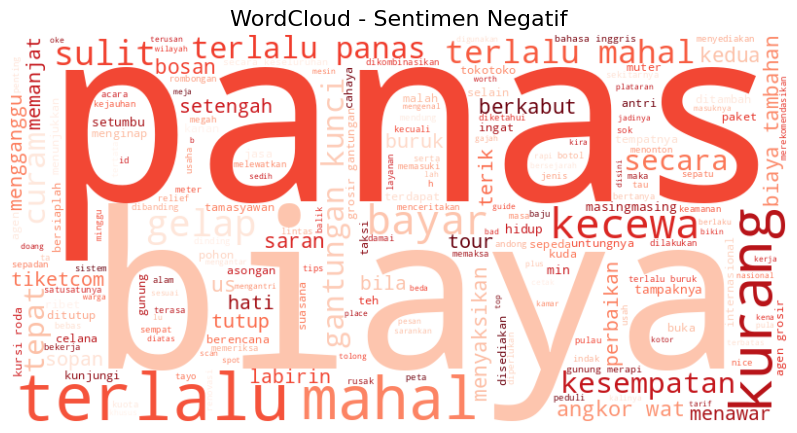

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load data (jika belum)
df = pd.read_csv('ulasan_borobudur_labeled_2kelas.csv', sep=';')

# Stopwords tambahan Bahasa Indonesia


custom_stopwords = [
    'saya', 'kami', 'kita', 'anda', 'mereka', 'tempat', 'candi', 'borobudur',
    'kuil', 'matahari', 'terbit', 'tidak', 'tapi', 'jika', 'sudah', 'ada',
    'bisa', 'hanya', 'lagi', 'melihat', 'pergi', 'hotel', 'pagi', 'sekitar',
    'sini', 'sana', 'lebih', 'harus', 'masuk', 'hari', 'waktu', 'dapat',
    'atas', 'saat', 'jam', 'mendapatkan', 'setelah', 'salah', 'satu',
    'ketika', 'sendiri', 'mungkin', 'tersebut', 'juga', 'semua', 'memiliki',
    'benar', 'oleh', 'seperti', 'tur', 'datang', 'saja', 'hingga', 'masih',
    'naik', 'benarbenar', 'banyak', 'yang', 'di', 'ke', 'dari', 'dalam',
    'untuk', 'dengan', 'pada', 'adalah', 'itu', 'ini', 'sangat', 'akan',
    'atau', 'dan', 'karena', 'sebuah', 'seorang', 'para', 'namun', 'agar',
    'bahwa', 'sebab', 'sehingga', 'sejak', 'antara', 'kepada', 'sebagai',
    'sebelum', 'sesudah', 'selama', 'sehabis', 'sebaiknya', 'sekali', 'terus',
    'tentu', 'tentang', 'terhadap', 'tanpa', 'melalui', 'mengenai', 'sedang',
    'sekarang', 'nanti', 'tadi', 'besok', 'kemarin', 'lusa', 'baru', 'pernah',
    'ingin', 'mau', 'musti', 'perlu', 'boleh', 'dulu', 'kembali', 'mula',
    'pertama', 'akhir', 'terakhir', 'belum', 'sudahkah', 'apakah', 'siapakah',
    'dimana', 'kemana', 'darimana', 'berapa', 'bagaimana', 'kenapa', 'mengapa',
    'siapapun', 'apapun', 'kapanpun', 'bagaimanapun', 'manapun', 'sedikit',
    'sebagian', 'kebanyakan', 'sepenuhnya', 'masing-masing',
    'sendiri-sendiri', 'saling', 'bersama', 'sendirian', 'berdua', 'bertiga',
    'berempat', 'orang', 'benda', 'hal', 'barang', 'sesuatu', 'seseorang',
    'beberapa', 'segala', 'segalanya', 'seluruh', 'seluruhnya', 'sebaik',
    'seburuk', 'sejelek', 'seindah', 'secantik', 'sebesar', 'sekecil',
    'setinggi', 'serendah', 'sejauh', 'sedekat', 'secepat', 'selambat',
    'sebanyak', 'sesedikit', 'serupa', 'sama', 'berbeda',
    'bermacam', 'beragam', 'bervariasi', 'berwarna-warni', 'berbeda-beda',
    'berulang', 'berkali-kali', 'bertingkat', 'berjenjang', 'berderet',
    'berbaris', 'berkelompok', 'berkumpul', 'berpisah', 'berserakan',
    'berhamburan', 'bertebaran', 'berjatuhan', 'berdiri', 'duduk', 'berbaring',
    'tidur', 'terbang', 'berenang', 'berlari', 'berjalan', 'berhenti',
    'bergerak', 'berputar', 'berbalik', 'maju', 'mundur', 'naik', 'turun',
    'masuk', 'keluar', 'datang', 'meninggalkan', 'tiba', 'sampai',
    'berangkat', 'pulang', 'melintas', 'melewati', 'menyeberang', 'menyusuri',
    'mengikuti', 'mengejar', 'menghindari', 'menyentuh', 'memegang', 'melepaskan',
    'mengangkat', 'menurunkan', 'mendorong', 'menarik', 'memutar', 'membuka',
    'menutup', 'memasukkan', 'mengeluarkan', 'mengisi', 'mengosongkan', 'mengganti',
    'memakai', 'melepas', 'mengenakan', 'membawa', 'mengambil', 'memberikan',
    'menerima', 'mengirim', 'mengembalikan', 'menyimpan', 'membuang',
    'mencari', 'menemukan', 'kehilangan', 'mendapat', 'memberi', 'mengambil',
    'melihat', 'mendengar', 'merasakan', 'mencium', 'mengecap', 'menyentuh',
    'berbicara', 'berkata', 'berteriak', 'berbisik', 'menjawab', 'aku', 'enggak',
    'sama', 'mengunjungi', 'kalau', 'jadi', 'mobil', 'area', 'puncak', 'prambanan',
    'lain', 'melakukan', 'sayang', 'cuaca', 'banget', 'awal', 'turis', 'ruang',
    'yogyakarta', 'indonesia', 'kaki', 'langsung', 'lokal', 'gambar', 'kota',
    'stupas', 'bus', 'informasi', 'liburan', 'menyewa', 'parkir', 'menunggu',
    'penjual', 'perjalanan', 'rupiah', 'membuat', 'membeli', 'makanan', 'kunjungan',
    'berada', 'per', 'wisata', 'tanggal', 'lokasi', 'anak', 'cuma', 'tinggi',
    'pikir', 'mencoba', 'kereta', 'air', 'topi', 'sayangnya', 'pemandangan',
    'pengunjung', 'indah', 'begitu', 'komplek', 'foto', 'pengalaman', 'tangga',
    'wisatawan', 'tahun', 'suvenir', 'situs', 'terutama', 'menjadi', 'mudah',
    'terbaik', 'luar biasa', 'layak', 'kecil', 'bawah', 'pagar', 'halaman',
    'manohara', 'mendaki', 'sunrise', 'dewasa', 'agama', 'biasa', 'bersih',
    'petugas', 'payung', 'coba', 'membawa', 'minuman', 'kali', 'asing', 'pelataran',
    'sejarah', 'panduan', 'pasar', 'membayar', 'tahu', 'ya', 'tetapi', 'membantu',
    'alasan', 'berkunjung', 'umum', 'gratis', 'menjual', 'diskon', 'tinggal',
    'toilet', 'akses', 'pemandu', 'lainnya', 'kios', 'sopir', 'pedagang', 'sewa',
    'tentang', 'sebuah', 'tengah', 'sebelumnya', 'membangun', 'batu', 'sibuk',
    'daerah', 'mulai', 'idr', 'keluarganya', 'terbenam', 'ok', 'kesini', 'karung',
    'cepat', 'sepanjang', 'taman', 'menyenangkan', 'hujan', 'jogja', 'lama',
    'setiap', 'mengatakan', 'bahkan', 'siang', 'apa', 'punya', 'menggunakan',
    'temple', 'rp', 'jawa', 'objek', 'disarankan', 'pakaian', 'transportasi',
    'sementara', 'merasa', 'termasuk', 'agak', 'dunia', 'pilihan', 'sekolah',
    'bukit', 'orangorang', 'terletak', 'info', 'belajar', 'depan', 'makan', 'pelan',
    'langkah', 'normal', 'penuh', 'jelas', 'spectakuler', 'jangan', 'lalu', 'bagian',
    'uang', 'tersedia', 'gantungan kunci', 'gerbang', 'loket', 'minta',
    'memberitahu', 'pribadi', 'minum', 'kopi', 'berkendara', 'setidaknya', 'motor',
    'memang', 'tingkat', 'pulang', 'buddhha', 'nyaman', 'tenang', 'ditemukan', 'cara',
    'libur', 'dijumpai', 'terkadang', 'pukul', 'museum', 'karcis', 'jalur', 'lantai',
    'musim', 'bangunan', 'wawasan', 'membaca', 'melebihi', 'setempat', 'arsitektur',
    'mahasiswa', 'kebaikan', 'meminta', 'telah', 'dekat', 'lihat', 'buat', 'malam',
    'penduduk', 'keluarga', 'budaya', 'terlihat', 'sarung', 'akhirnya', 'biasanya',
    'menguras', 'monumen', 'menawarkan', 'pas', 'menghabiskan', 'menurut', 'mengerti',
    'percaya', 'sih', 'online', 'antrian', 'kartu', 'go', 'luas', 'seharusnya',
    'mengagumkan', 'berkeliling', 'ticket', 'segera', 'terbuka', 'lumayan', 'menjaga',
    'bali', 'biar', 'menaikkan', 'rupanya', 'tertinggi', 'berjalan', 'angkor wat',
    'rasanya', 'stasiun', 'bukan', 'batik', 'kamu', 'undang', 'paling', 'memutuskan',
    'total', 'muslim', 'pintunya', 'diberi', 'bagus', 'pintu', 'baik', 'menakjubkan',
    'cukup', 'besar', 'ramai', 'harga', 'tiket', 'jalan', 'wisata', 'pengunjung',
    'pemandangan', 'tahun', 'membayar', 'sewa', 'foto', 'pengalaman', 'tangga','makan',
    'pelan', 'langkah', 'normal', 'penuh', 'jelas', 'spectakuler', 'jangan', 'lalu',
    'bagian', 'uang', 'tersedia', 'gantungan kunci', 'gerbang', 'loket', 'minta',
    'memberitahu', 'pribadi', 'minum', 'kopi', 'berkendara', 'setidaknya', 'motor',
    'memang', 'tingkat', 'buddhha', 'nyaman', 'tenang', 'ditemukan', 'cara', 'libur',
    'dijumpai', 'terkadang', 'pukul', 'museum', 'karcis', 'jalur', 'lantai', 'musim',
    'bangunan', 'wawasan', 'membaca', 'melebihi', 'setempat', 'arsitektur', 'mahasiswa',
    'kebaikan', 'meminta', 'telah', 'dekat', 'lihat', 'buat', 'malam', 'penduduk',
    'keluarga', 'budaya', 'terlihat', 'sarung', 'akhirnya', 'biasanya', 'menguras',
    'monumen', 'menawarkan', 'pas', 'menghabiskan', 'menurut', 'mengerti', 'percaya',
    'sih', 'online', 'antrian', 'kartu', 'go', 'luas', 'seharusnya', 'mengagumkan',
    'berkeliling', 'ticket', 'segera', 'terbuka', 'lumayan', 'menjaga', 'bali',
    'biar', 'menaikkan', 'rupanya', 'tertinggi', 'berjalan', 'angkor wat', 'rasanya',
    'stasiun', 'bukan', 'batik', 'kamu', 'undang', 'paling', 'memutuskan', 'total',
    'muslim', 'pintunya', 'diberi', 'pintu', 'menakjubkan', 'cukup', 'besar', 'harga',
    'tiket', 'jalan', 'wisata', 'pengunjung', 'pemandangan', 'tahun', 'membayar',
    'sewa', 'foto', 'pengalaman', 'tangga','nya', 'menikmati', 'beli', 'pasti',
    'pun', 'candinya', 'dilihat', 'menit',
    'souvenir', 'utamanya', 'tua', 'berarti',
    'lupa', 'menjelaskan', 'mencapai', 'bangun',
    'kesana', 'domestik', 'seru', 'supaya',
    'terungkap', 'sebelah', 'menutupi', 'belakang',
    'rumah', 'mengharapkan',
    'luar', 'kemudian', 'memang', 'merupakan', 'tetap', 'bawa', 'tingkat',
    'menuju', 'kalau', 'padahal', 'bagi', 'buddhha', 'cerita', 'diberitahu',
    'hampir', 'daripada', 'toko', 'keindahan', 'senin', 'parkiran',
    'terpisah', 'menyenangkan', 'walaupun', 'patung', 'kondisi',
    'dibandingkan', 'menyelamatkan', 'pedagang',
    'luar', 'kemudian', 'memang', 'merupakan',
    'tetap', 'bawa', 'tingkat', 'menuju',
    'kalau', 'padahal', 'bagi', 'buddhha',
    'cerita', 'diberitahu', 'hampir', 'daripada',
    'toko', 'keindahan', 'senin', 'parkiran',
    'terpisah', 'menyenangkan', 'walaupun', 'patung',
    'kondisi', 'dibandingkan', 'menyelamatkan', 'pedagang',
    'bagus', 'baik', 'pintu', 'batu',
    'ramai', 'jauh','murah','good','kompleks', 'pandemi',
    'terjadi', 'good','magelang', 'stupa''bayar', 'wisata', 'warisan', 'santai',
    'disana', 'dapat','meskipun','pakai','ternyata','dikunjungi','anakanak',
    'pastikan','dia','usd','memilih','sore','stupa','mana','wajib','arah'
    ,'dua','keatas','buddha','selalu','terbesar','mengesankan','bulan',
    'menyarankan','dll','butuh','deh','tak','barat','kerumunan','diri',
    'gantungankunci','keluarnya','kiri','keren','ramah','harusnya','teman'
    ,'visit','dibangun','keliling','fasilitas','puas','pusat','jombor','mineral'
    ,'gantungan kunci','kalo','utama','panjang','kabut','sarapan'
    ,'dibuka','masalah','spektakuler','selfie','rasa','suka','diberikan','unesco'
    ,'berpikir','menaiki','yogya','kelompok','cuman','ukiran','pelajar','keajaiban'
    ,'sisi','penukaran','tangan','senter','terawat','sunset','kawasan','memesan',
    'ribu','timur','tertarik','jumlah','pekan','angkor wat','angkorwat', 'senang'
    ,'web','sempurna','sopan''mengingat', 'berisi', 'tertarik', 'melelahkan', 'capek'
    ,'tiketnya', 'harganya', 'jalannya', 'angkutan','menjelajahi', 'sarang', 'berkat', 'menarik',
    'menghidupkan', 'suasana', 'internasional', 'menjaga'
    ]

additional_stopwords = [
    'luar', 'kemudian', 'memang', 'merupakan',
    'tetap', 'bawa', 'tingkat', 'menuju',
    'kalau', 'padahal', 'bagi', 'buddhha',
    'cerita', 'diberitahu', 'hampir', 'daripada',
    'toko', 'keindahan', 'senin', 'parkiran',
    'terpisah', 'menyenangkan', 'walaupun', 'patung',
    'kondisi', 'dibandingkan', 'menyelamatkan', 'pedagang',
    'bagus', 'baik', 'pintu', 'batu',
    'ramai', 'jauh', 'keatas', 'anak-anak',
    'memilih','luar', 'kemudian', 'memang', 'merupakan',
    'tetap', 'bawa', 'tingkat', 'menuju',
    'kalau', 'padahal', 'bagi', 'buddhha',
    'cerita', 'diberitahu', 'hampir', 'daripada',
    'toko', 'keindahan', 'senin', 'parkiran',
    'terpisah', 'menyenangkan', 'walaupun', 'patung',
    'kondisi', 'dibandingkan', 'menyelamatkan', 'pedagang',
    'bagus', 'baik', 'pintu', 'batu',
    'ramai', 'jauh', 'keatas', 'anak-anak',
    'memilih', 'pakai', 'terlalu', 'dua',
    'terjadi', 'sisi', 'good','murah','kompleks', 'pandemi',
    'terjadi', 'good','magelang', 'stupa'
]



stopwords_id = set(STOPWORDS)
stopwords_id.update(custom_stopwords)
stopwords_id.update([
    'yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'dengan',
    'pada', 'adalah', 'itu', 'ini', 'sangat', 'akan', 'juga',
    'karena', 'atau', 'sudah', 'sebagai', 'dalam'
])

text_negatif = ' '.join(df[df['sentiment'] == 'negatif']['ulasan'].astype(str))

wordcloud_neg = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=stopwords_id,
    colormap='Reds',
    random_state=42 # Tambahkan ini!
).generate(text_negatif)

# Tampilkan berdampingan
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Sentimen Negatif", fontsize=16)

plt.tight_layout()
plt.show()